In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from pandas.core.common import flatten

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data_path = "/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/Data"

dir_store_path = os.path.join(data_path, "temporary results")

processed_dataset_path = os.path.join(dir_store_path, "processed_dataset.xlsx")

In [3]:
full_df = pd.read_excel(processed_dataset_path)

# Dataset Preprocessing

In [4]:
tntc_condition = (
    (full_df["Coliform (1ml)_mean"] == "TNTC")
    | (full_df["Ecoli (1ml)_mean"] == "TNTC")
    | (full_df["Coliform (1ml)_mean"] == 0)
)

In [5]:
tntc_df = full_df[tntc_condition]

In [6]:
clean_df = full_df.drop(tntc_df.index)

In [7]:
clean_df

Unnamed: 0   index            DateTime Site  Bottle  Sample  \
0            16    16.0 2023-02-07 08:18:00    D       1       0   
1            17    17.0 2023-02-07 08:18:00    D       2       0   
2            28    28.0 2023-02-14 09:55:00    D       1       0   
3            29    29.0 2023-02-14 09:55:00    D       2       0   
4            40    40.0 2023-02-21 16:10:00    D       1       0   
..          ...     ...                 ...  ...     ...     ...   
253         875   875.0 2023-09-04 14:06:00    D       2       2   
254         884   884.0 2023-09-04 14:22:00    D       1       1   
255         983   983.0 2023-09-05 14:15:00    D       1       1   
256         984   984.0 2023-09-05 14:15:00    D       1       2   
257        1000  1000.0 2023-09-05 14:44:00    D       1       1   

    Technician Water Quality Technician Counting  Temp C_mean  Ph_mean  \
0                      Randa               Randa          6.0      8.1   
1                      Randa               Randa          6.0      8.2   
2                      Randa               Randa          9.0      7.8   
3                      Randa               Randa          8.0      8.0   
4                      Randa               Randa         11.0      8.0   
..                       ...                 ...          ...      ...   
253                      NaN               Admin         21.9      7.8   
254                      NaN               Admin         23.0      7.5   
255                      NaN                 Vee         23.9      7.6   
256                      NaN                 Vee         23.9      7.6   
257                      NaN                 Vee         23.0      7.7   

     Cond (ms)_mean Coliform (1ml)_mean Ecoli (1ml)_mean  
0              0.80                  16                6  
1              0.77                  10                6  
2              0.80                  11                5  
3              0.80                  22                7  
4              1.25                  19                6  
..              ...                 ...              ...  
253            1.46                35.5              3.5  
254            1.49                67.5                8  
255            1.46                34.5                8  
256            1.46                36.5              8.5  
257            1.44                  54              6.5  

[257 rows x 13 columns]

# Utils

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut

In [9]:
import sklearn.metrics as metrics


def regression_results(y_true, y_pred):
    # Regression metrics
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))

# Per Site Ecoli Regression

In [10]:
ecoli_df = clean_df.drop(columns=["Coliform (1ml)_mean"])

In [11]:
ecoli_df

Unnamed: 0   index            DateTime Site  Bottle  Sample  \
0            16    16.0 2023-02-07 08:18:00    D       1       0   
1            17    17.0 2023-02-07 08:18:00    D       2       0   
2            28    28.0 2023-02-14 09:55:00    D       1       0   
3            29    29.0 2023-02-14 09:55:00    D       2       0   
4            40    40.0 2023-02-21 16:10:00    D       1       0   
..          ...     ...                 ...  ...     ...     ...   
253         875   875.0 2023-09-04 14:06:00    D       2       2   
254         884   884.0 2023-09-04 14:22:00    D       1       1   
255         983   983.0 2023-09-05 14:15:00    D       1       1   
256         984   984.0 2023-09-05 14:15:00    D       1       2   
257        1000  1000.0 2023-09-05 14:44:00    D       1       1   

    Technician Water Quality Technician Counting  Temp C_mean  Ph_mean  \
0                      Randa               Randa          6.0      8.1   
1                      Randa               Randa          6.0      8.2   
2                      Randa               Randa          9.0      7.8   
3                      Randa               Randa          8.0      8.0   
4                      Randa               Randa         11.0      8.0   
..                       ...                 ...          ...      ...   
253                      NaN               Admin         21.9      7.8   
254                      NaN               Admin         23.0      7.5   
255                      NaN                 Vee         23.9      7.6   
256                      NaN                 Vee         23.9      7.6   
257                      NaN                 Vee         23.0      7.7   

     Cond (ms)_mean Ecoli (1ml)_mean  
0              0.80                6  
1              0.77                6  
2              0.80                5  
3              0.80                7  
4              1.25                6  
..              ...              ...  
253            1.46              3.5  
254            1.49                8  
255            1.46                8  
256            1.46              8.5  
257            1.44              6.5  

[257 rows x 12 columns]

## One-at-a-time Relationship

### Temperature

In [12]:
temp_results = {}

In [13]:
X, y = ecoli_df[["Site", "Temp C_mean"]], ecoli_df[["Site", "Ecoli (1ml)_mean"]]

#### Linear Regression

In [14]:
temp_results["LinearRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # evaluate model
        yhat = lin_reg.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    temp_results["LinearRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Ridge Regression

In [15]:
temp_results["Ridge"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        ridge = Ridge()
        ridge.fit(X_train, y_train)
        # evaluate model
        yhat = ridge.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    temp_results["Ridge"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Lasso Regression

In [16]:
temp_results["Lasso"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lasso = Lasso()
        lasso.fit(X_train, y_train)
        # evaluate model
        yhat = lasso.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    temp_results["Lasso"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Bayesian Linear Regression

In [17]:
temp_results["BayesianLinearRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        bayeasian_ridge = BayesianRidge()
        bayeasian_ridge.fit(X_train, y_train)
        # evaluate model
        yhat = bayeasian_ridge.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    temp_results["BayesianLinearRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

#### Polynomial Regression

In [18]:
temp_results["PolynomialRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(X_site)
    poly_features = pd.DataFrame(poly_features)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(poly_features):
        # split data
        X_train, X_test = (
            poly_features.iloc[train_ix, :],
            poly_features.iloc[test_ix, :],
        )
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # evaluate model
        yhat = lin_reg.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    temp_results["PolynomialRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Temperature Results

In [19]:
rows = []

for model in temp_results.keys():
    for site in temp_results[model].keys():
        row = {
            "Model": model,
            "Site": site,
            "MSE": temp_results[model][site]["mse"],
            "RMSE": temp_results[model][site]["rmse"],
            "R2": temp_results[model][site]["r2"],
            "Residuals": temp_results[model][site]["residuals"],
            "y_pred": temp_results[model][site]["y_pred"],
            "y_true": temp_results[model][site]["y_true"],
        }
        rows.append(row)

df_results = pd.DataFrame(rows)
df_results.sort_values(by=["Site"], inplace=True)

In [20]:
for site in df_results["Site"].unique():
    print(f"====================== Site: {site} ======================")
    for model in df_results["Model"].unique():
        print("MODEL:", model)
        y_test = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_true"].values[0]
        y_pred = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_pred"].values[0]
        regression_results(y_test, y_pred)
        print()

====================== Site: A ======================
MODEL: PolynomialRegression
r2:  0.1658
MAE:  6.1268
MSE:  89.7953
RMSE:  9.476

MODEL: BayesianLinearRegression
r2:  0.056
MAE:  6.85
MSE:  101.6091
RMSE:  10.0801

MODEL: LinearRegression
r2:  0.0658
MAE:  6.9703
MSE:  100.5628
RMSE:  10.0281

MODEL: Lasso
r2:  0.0477
MAE:  6.7499
MSE:  102.5084
RMSE:  10.1246

MODEL: Ridge
r2:  0.0676
MAE:  6.9198
MSE:  100.3641
RMSE:  10.0182

====================== Site: B ======================
MODEL: PolynomialRegression
r2:  -0.0014
MAE:  8.0193
MSE:  105.2677
RMSE:  10.26

MODEL: BayesianLinearRegression
r2:  -0.049
MAE:  8.4932
MSE:  110.2663
RMSE:  10.5008

MODEL: LinearRegression
r2:  -0.0585
MAE:  8.5916
MSE:  111.2606
RMSE:  10.548

MODEL: Lasso
r2:  -0.0512
MAE:  8.525
MSE:  110.4985
RMSE:  10.5118

MODEL: Ridge
r2:  -0.0582
MAE:  8.5902
MSE:  111.2365
RMSE:  10.5469

====================== Site: C ======================
MODEL: PolynomialRegression
r2:  -0.014
MAE:  22.6019
MSE:  1126

##### Estimated Functions

In [21]:
%%script false --no-raise-error

# plot each estimated function and the real data points for each site
for site in df_results["Site"].unique():
    for model in df_results["Model"].unique():

        if model == "PolynomialRegression":
            result_model_site = df_results[
                (df_results["Site"] == site) & (df_results["Model"] == model)
            ]

            coefficients = result_model_site["Coefficients"].values[0]
            intercept = result_model_site["Intercept"].values[0]

            x_est = np.linspace(0, 30, 100)
            y_est = intercept + coefficients[0] * x_est + coefficients[1] * x_est ** 2

            plt.plot(x_est, y_est, label=model)
            plt.scatter(X[X["Site"] == site]["Temp C_mean"], y[y['Site'] == site]['Ecoli (1ml)_mean'], label="Real Data")
            plt.title(f"Site: {site} - {model}")
        else:
            result_model_site = df_results[
                (df_results["Site"] == site) & (df_results["Model"] == model)
            ]

            coefficients = result_model_site["Coefficients"].values[0]
            intercept = result_model_site["Intercept"].values[0]

            x_est = np.linspace(0, 30, 100)
            y_est = intercept + coefficients[0] * x_est

            plt.plot(x_est, y_est, label=model)
            plt.scatter(X[X["Site"] == site]["Temp C_mean"], y[y['Site'] == site]['Ecoli (1ml)_mean'], label="Real Data")
            plt.title(f"Site: {site} - {model}")
        plt.show()
        print()

##### Residuals

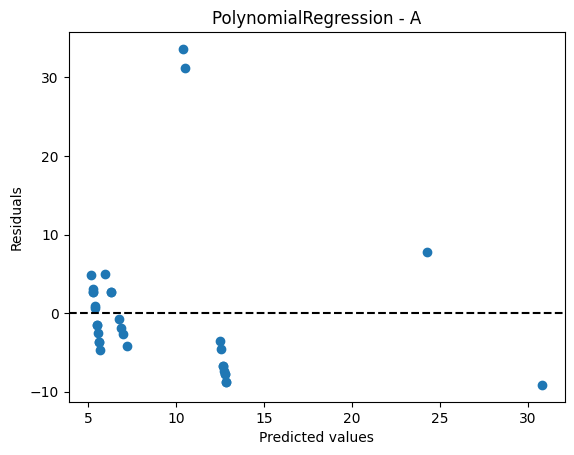

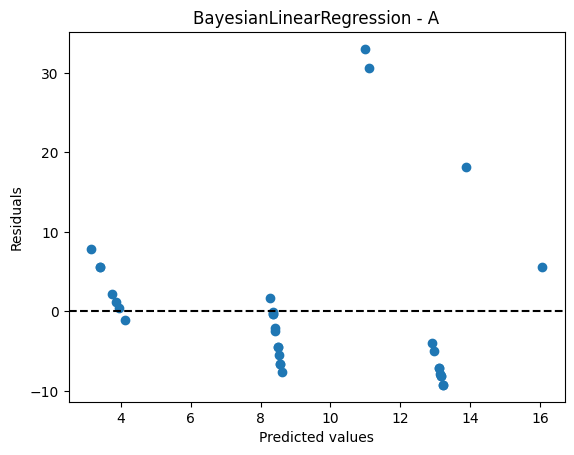

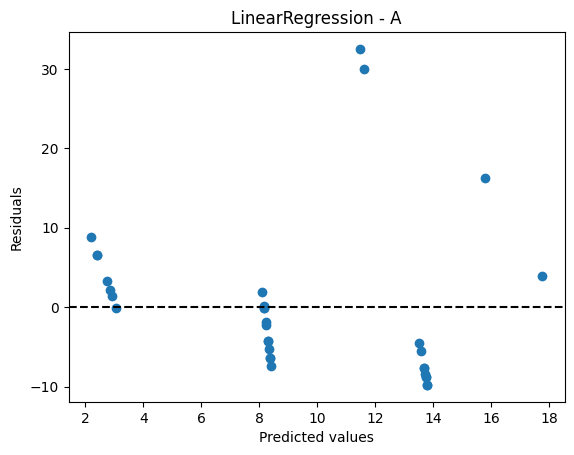

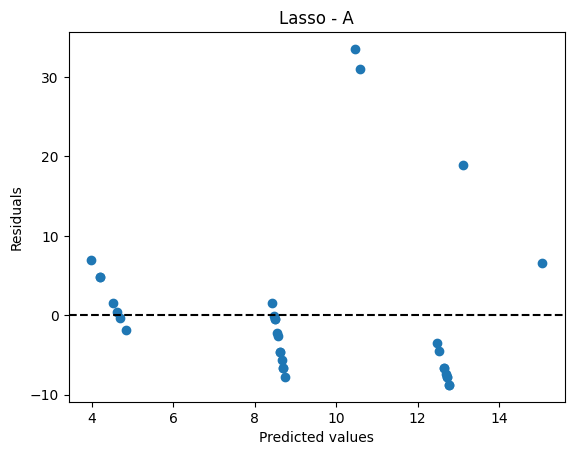

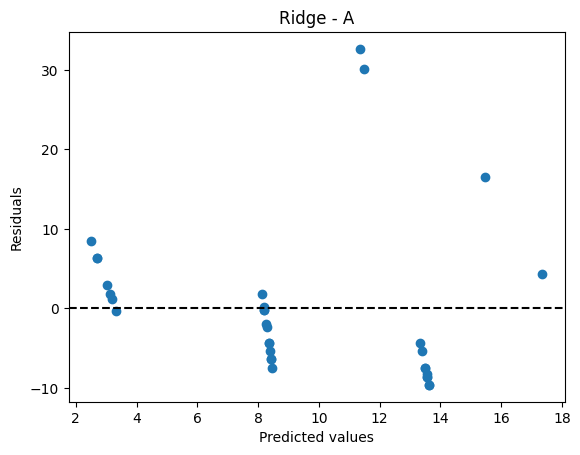

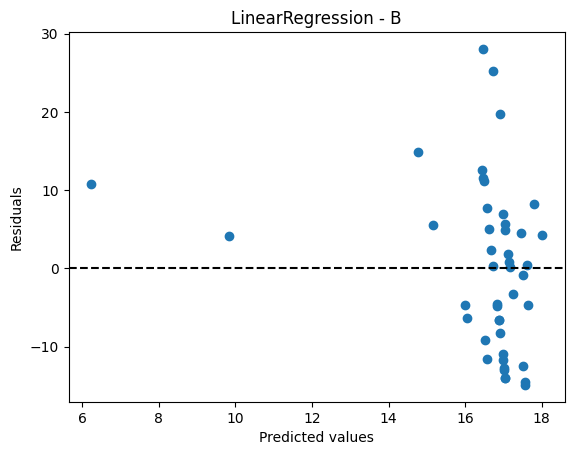

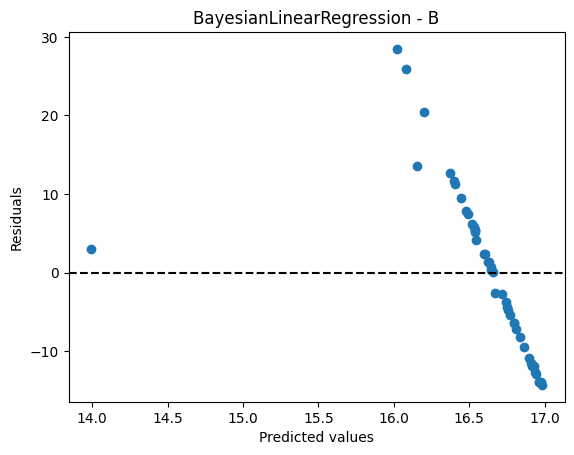

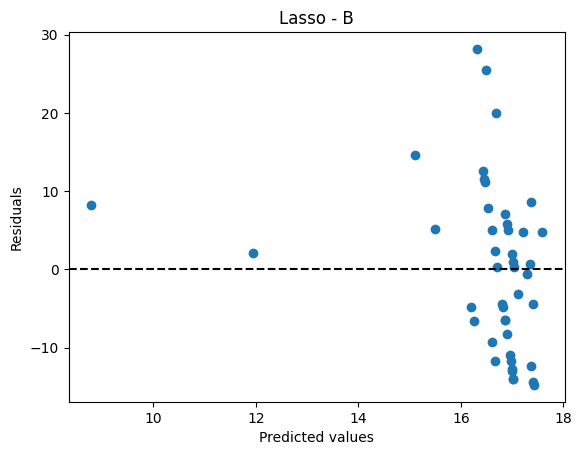

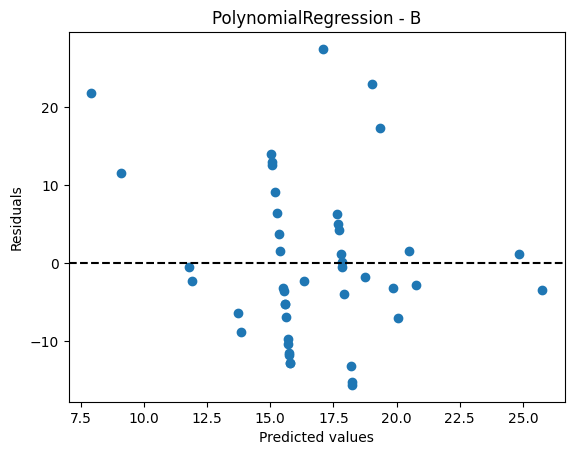

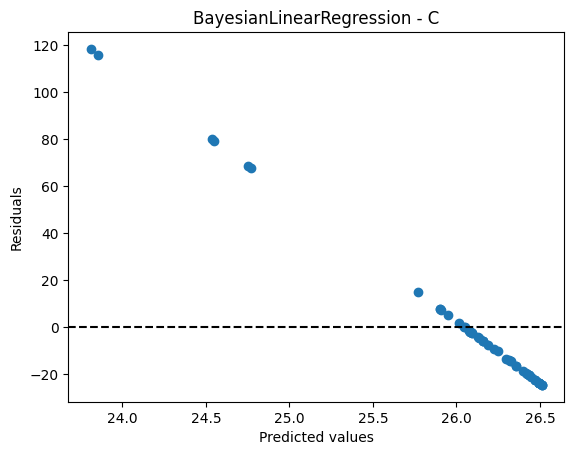

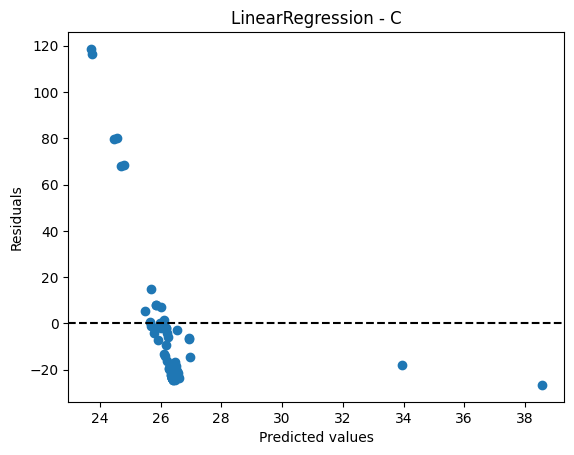

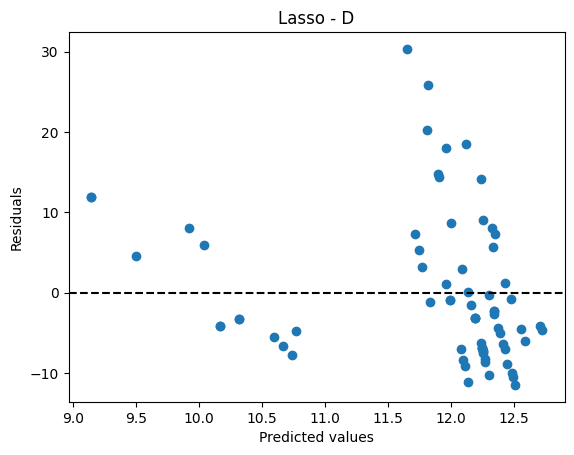

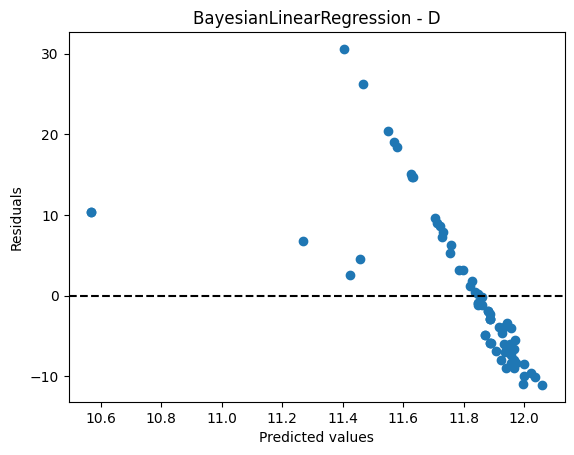

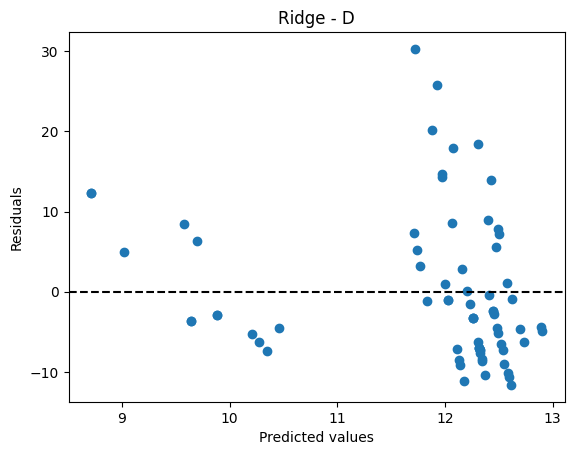

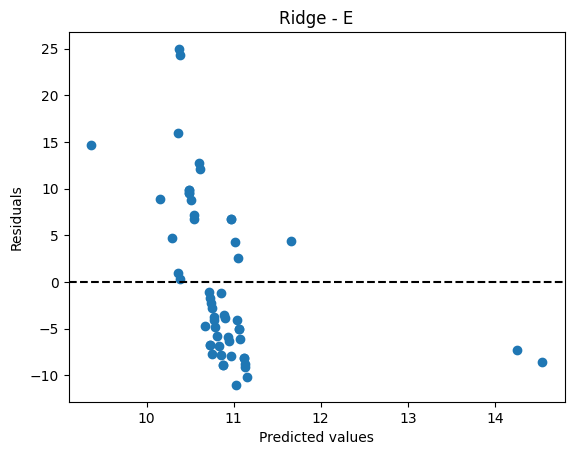

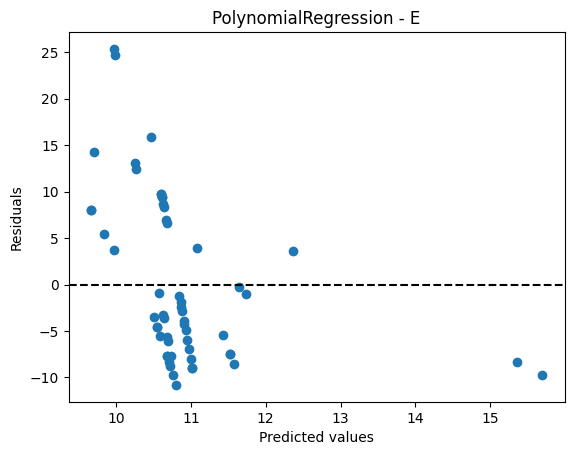

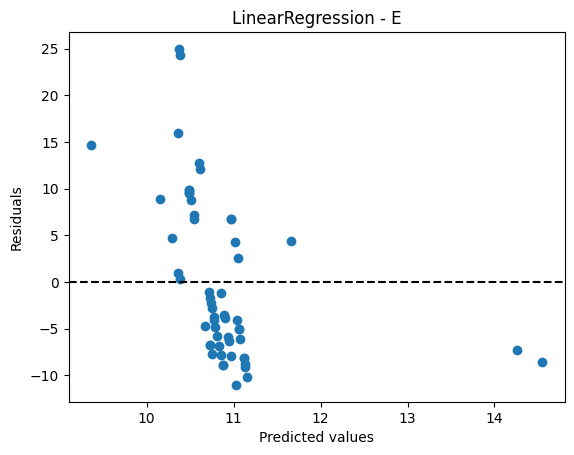

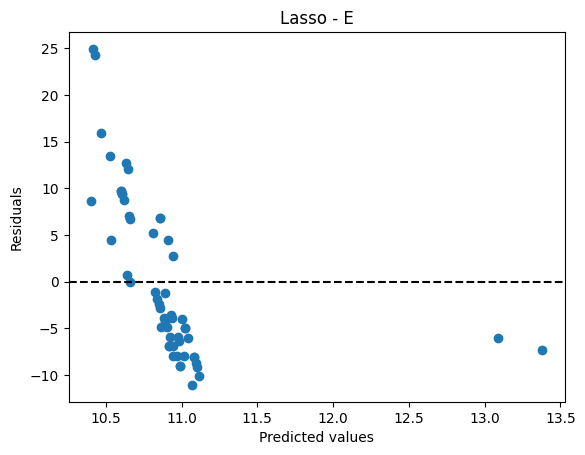

In [22]:
for site in df_results["Site"].unique():
    df_site = df_results[df_results["Site"] == site]
    for model in df_site["Model"].unique():
        df_model = df_site[df_site["Model"] == model]
        y_pred = df_model["y_pred"].values[0]
        residuals = df_model["Residuals"].values[0]
        plt.scatter(y_pred, residuals)
        plt.axhline(y=0.0, color="black", linestyle="--")
        plt.title(f"{model} - {site}")
        plt.xlabel("Predicted values")
        plt.ylabel("Residuals")
        plt.show()

##### Predicted vs Actual

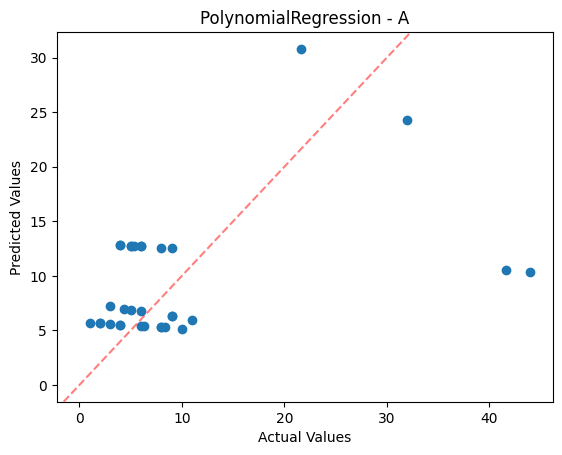

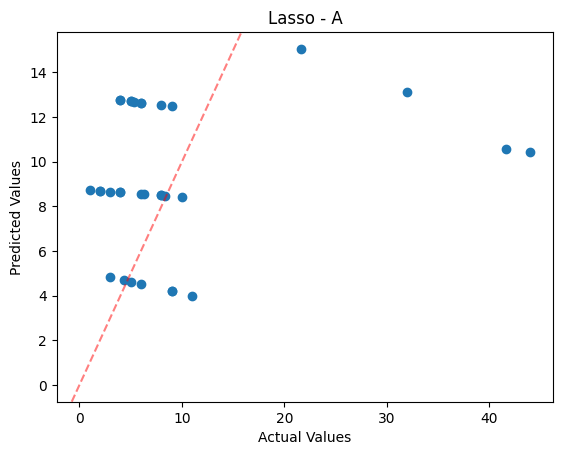

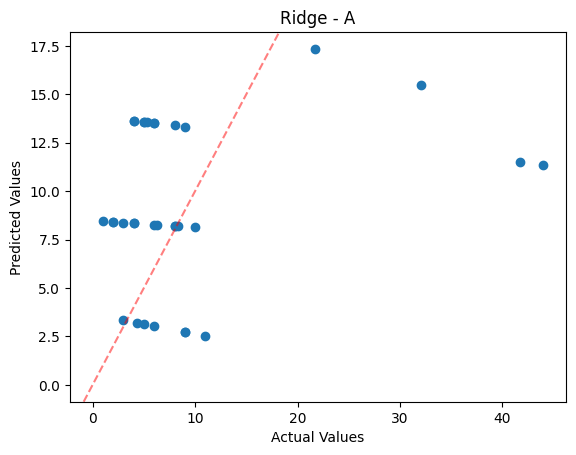

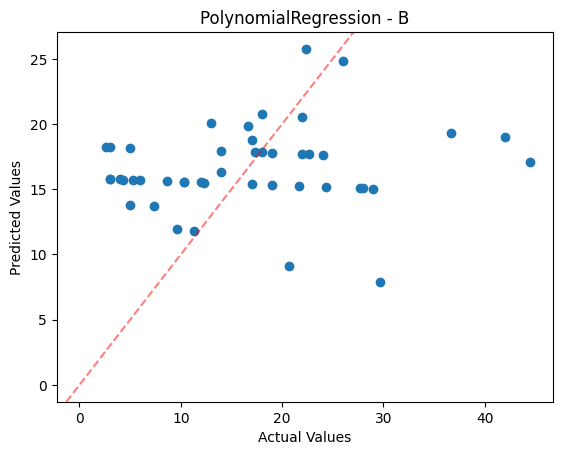

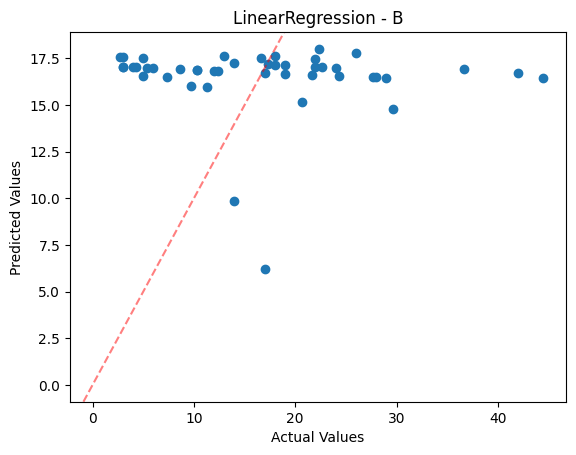

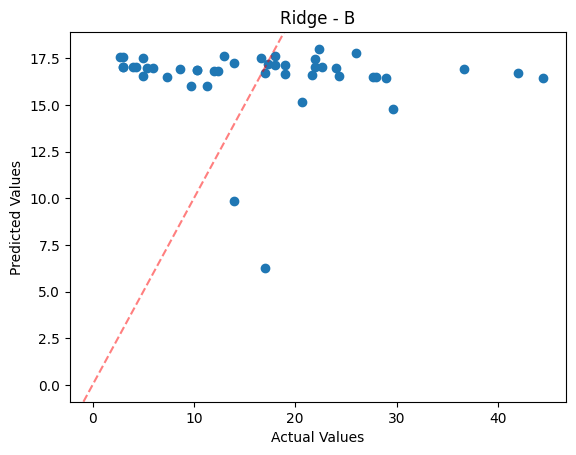

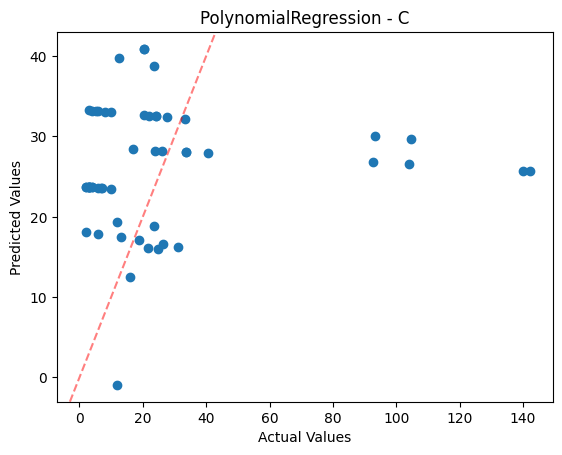

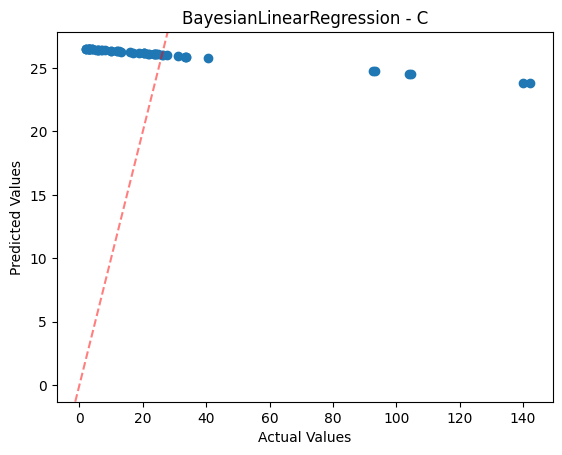

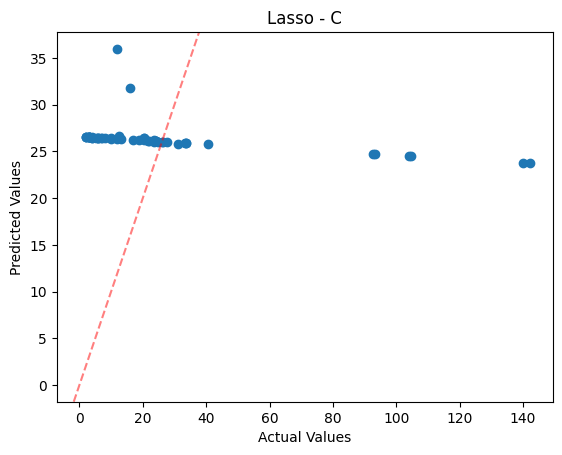

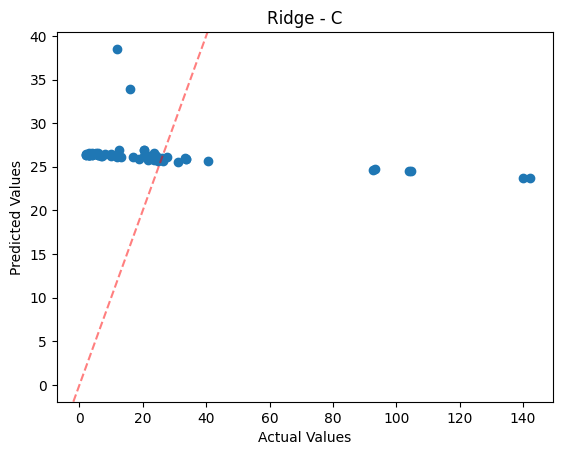

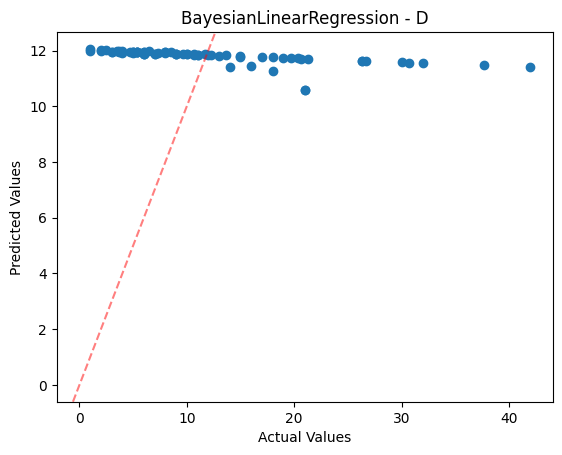

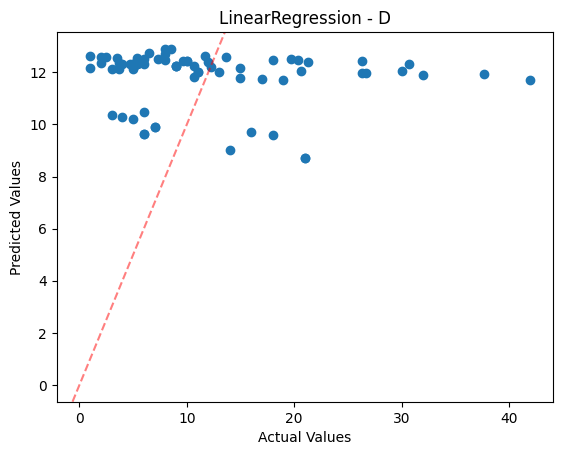

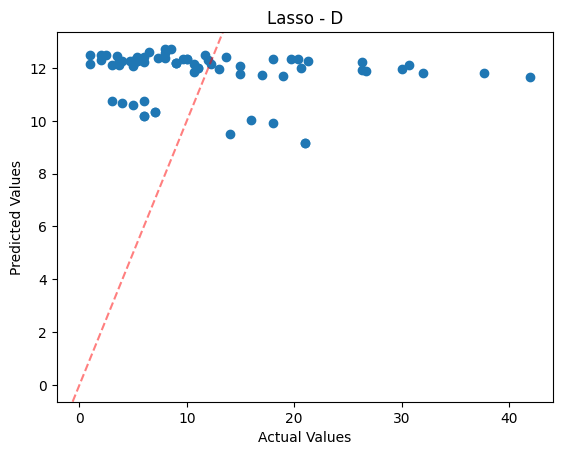

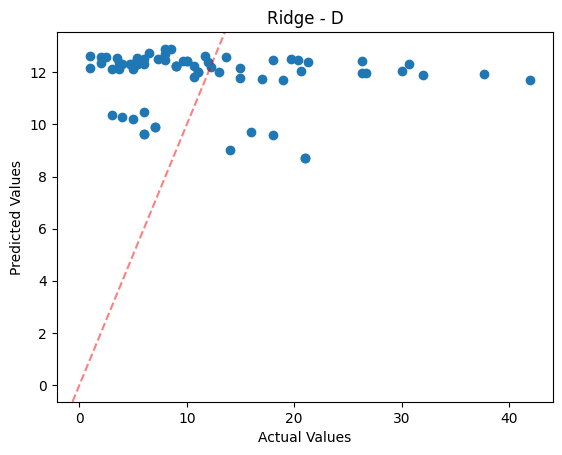

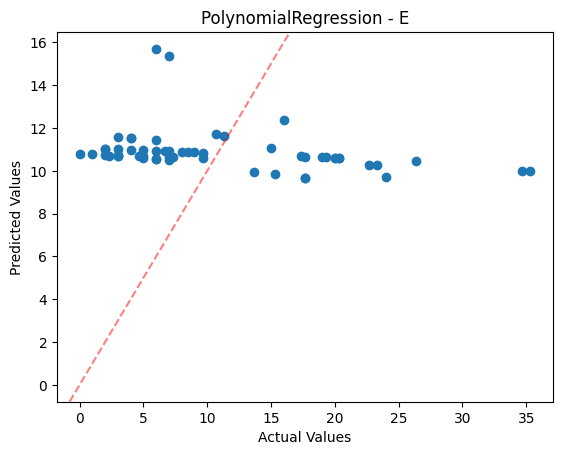

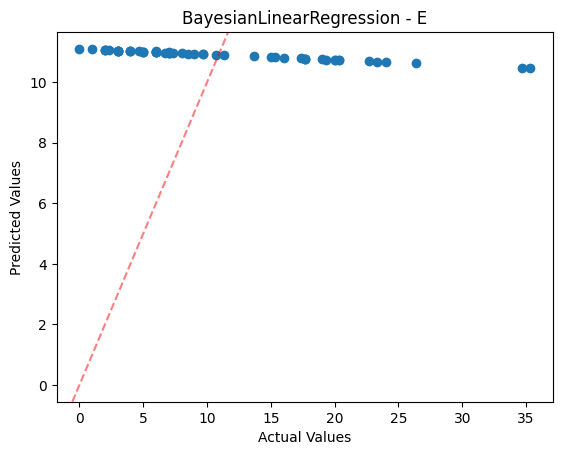

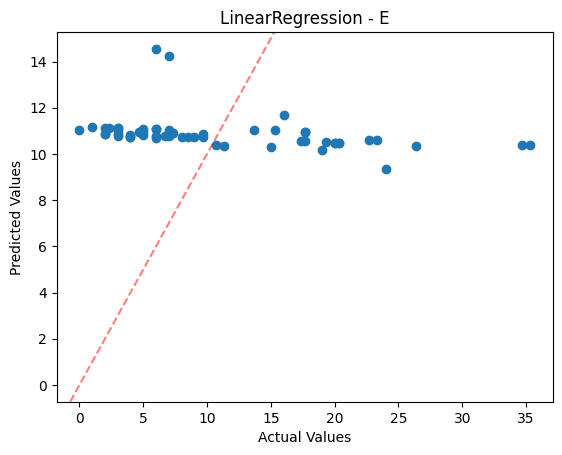

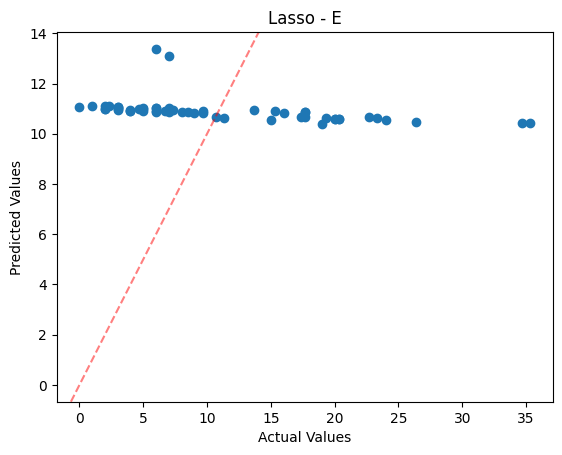

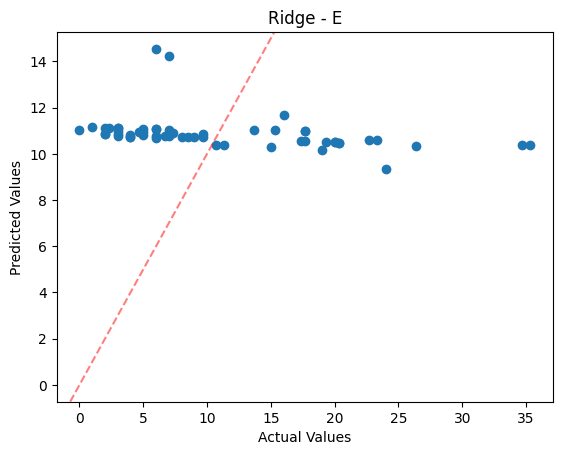

In [23]:
for site in df_results["Site"].unique():
    for model in df_results["Model"].unique():
        y_test = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_true"].values[0]
        y_pred = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_pred"].values[0]

        plt.scatter(y_test, y_pred)
        plt.axline([0, 0], [1, 1], color="red", linestyle="--", alpha=0.5)
        plt.title(f"{model} - {site}")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.show()

### pH

In [24]:
ph_results = {}

In [25]:
X, y = ecoli_df[["Site", "Ph_mean"]], ecoli_df[["Site", "Ecoli (1ml)_mean"]]

#### Linear Regression

In [26]:
ph_results["LinearRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # evaluate model
        yhat = lin_reg.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    ph_results["LinearRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Ridge Regression

In [27]:
ph_results["Ridge"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        ridge = Ridge()
        ridge.fit(X_train, y_train)
        # evaluate model
        yhat = ridge.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    ph_results["Ridge"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Lasso Regression

In [28]:
ph_results["Lasso"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lasso = Lasso()
        lasso.fit(X_train, y_train)
        # evaluate model
        yhat = lasso.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    ph_results["Lasso"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Bayesian Linear Regression

In [29]:
ph_results["BayesianLinearRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        bayeasian_ridge = BayesianRidge()
        bayeasian_ridge.fit(X_train, y_train)
        # evaluate model
        yhat = bayeasian_ridge.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    ph_results["BayesianLinearRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

#### Polynomial Regression

In [30]:
ph_results["PolynomialRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(X_site)
    poly_features = pd.DataFrame(poly_features)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(poly_features):
        # split data
        X_train, X_test = (
            poly_features.iloc[train_ix, :],
            poly_features.iloc[test_ix, :],
        )
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # evaluate model
        yhat = lin_reg.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    ph_results["PolynomialRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### pH Results

In [31]:
rows = []

for model in ph_results.keys():
    for site in ph_results[model].keys():
        row = {
            "Model": model,
            "Site": site,
            "MSE": ph_results[model][site]["mse"],
            "R2": ph_results[model][site]["r2"],
            "Residuals": ph_results[model][site]["residuals"],
            "y_pred": ph_results[model][site]["y_pred"],
            "y_true": ph_results[model][site]["y_true"],
        }
        rows.append(row)

df_results = pd.DataFrame(rows)
df_results.sort_values(by=["Site"], inplace=True)

In [32]:
for site in df_results["Site"].unique():
    print(f"====================== Site: {site} ======================")
    for model in df_results["Model"].unique():
        print("MODEL:", model)
        y_test = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_true"].values[0]
        y_pred = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_pred"].values[0]
        regression_results(y_test, y_pred)
        print()

====================== Site: A ======================
MODEL: PolynomialRegression
r2:  0.8119
MAE:  3.4567
MSE:  20.245
RMSE:  4.4994

MODEL: BayesianLinearRegression
r2:  0.478
MAE:  6.1611
MSE:  56.1862
RMSE:  7.4957

MODEL: LinearRegression
r2:  0.4844
MAE:  6.1549
MSE:  55.4969
RMSE:  7.4496

MODEL: Lasso
r2:  -0.0498
MAE:  6.5053
MSE:  113.0013
RMSE:  10.6302

MODEL: Ridge
r2:  0.2349
MAE:  5.8309
MSE:  82.3558
RMSE:  9.075

====================== Site: B ======================
MODEL: PolynomialRegression
r2:  -0.1307
MAE:  8.91
MSE:  118.8528
RMSE:  10.902

MODEL: BayesianLinearRegression
r2:  -0.046
MAE:  8.4308
MSE:  109.9483
RMSE:  10.4856

MODEL: LinearRegression
r2:  -0.0881
MAE:  8.67
MSE:  114.3797
RMSE:  10.6948

MODEL: Lasso
r2:  -0.046
MAE:  8.4308
MSE:  109.9477
RMSE:  10.4856

MODEL: Ridge
r2:  -0.06
MAE:  8.5061
MSE:  111.4244
RMSE:  10.5558

====================== Site: C ======================
MODEL: PolynomialRegression
r2:  0.3173
MAE:  19.1614
MSE:  758.4271
RMS

##### Estimated Functions

In [33]:
%% script false --no-raise-error

# plot each estimated function and the real data points for each site
for site in df_results["Site"].unique():
    for model in df_results["Model"].unique():

        if model == "PolynomialRegression":
            result_model_site = df_results[
                (df_results["Site"] == site) & (df_results["Model"] == model)
            ]

            coefficients = result_model_site["Coefficients"].values[0]
            intercept = result_model_site["Intercept"].values[0]

            x_est = np.linspace(0, 10, 100)
            y_est = intercept + coefficients[0] * x_est + coefficients[1] * x_est ** 2

            plt.plot(x_est, y_est, label=model)
            plt.scatter(X[X["Site"] == site]["Ph_mean"], y[y['Site'] == site]['Ecoli (1ml)_mean'], label="Real Data")
            plt.title(f"Site: {site} - {model}")
        else:
            result_model_site = df_results[
                (df_results["Site"] == site) & (df_results["Model"] == model)
            ]

            coefficients = result_model_site["Coefficients"].values[0]
            intercept = result_model_site["Intercept"].values[0]

            x_est = np.linspace(0, 10, 100)
            y_est = intercept + coefficients[0] * x_est

            plt.plot(x_est, y_est, label=model)
            plt.scatter(X[X["Site"] == site]["Ph_mean"], y[y['Site'] == site]['Ecoli (1ml)_mean'], label="Real Data")
            plt.title(f"Site: {site} - {model}")
        plt.show()
        print()

UsageError: Cell magic `%%` not found.


##### Residuals

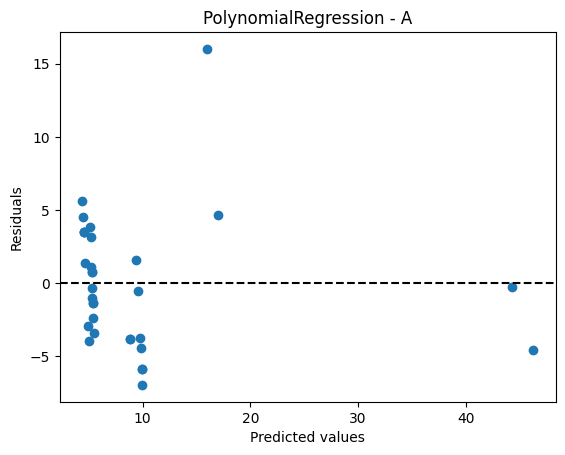

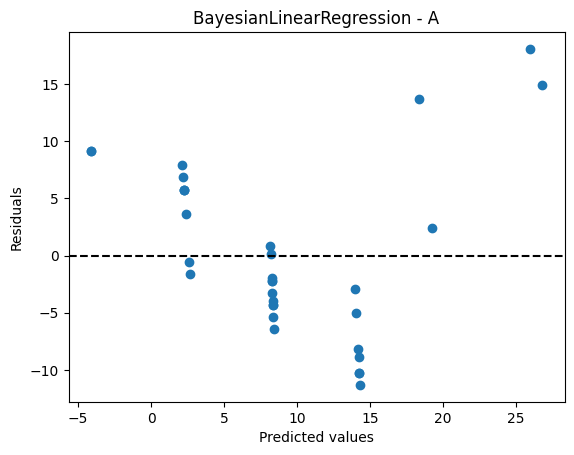

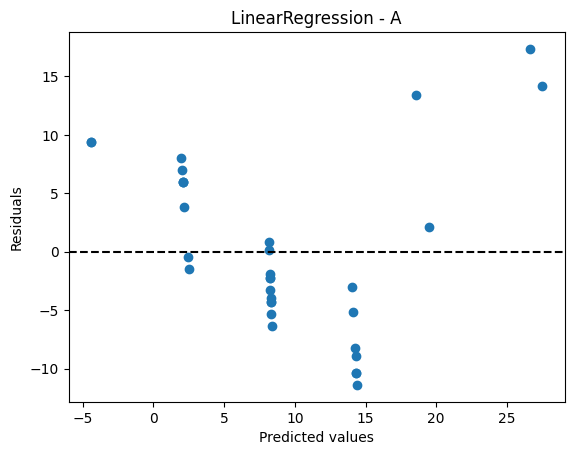

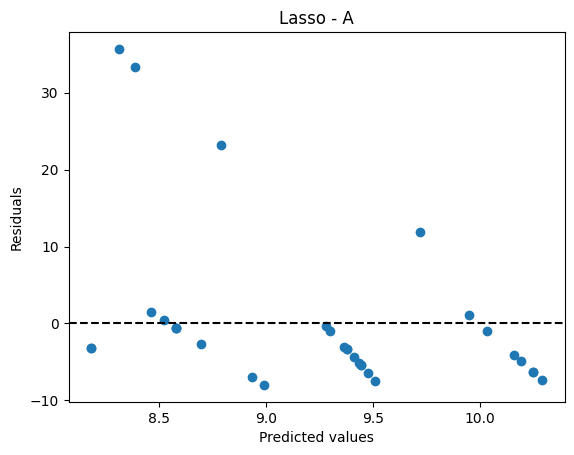

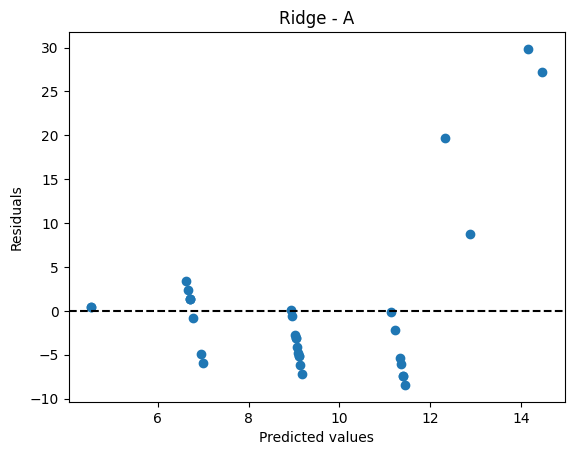

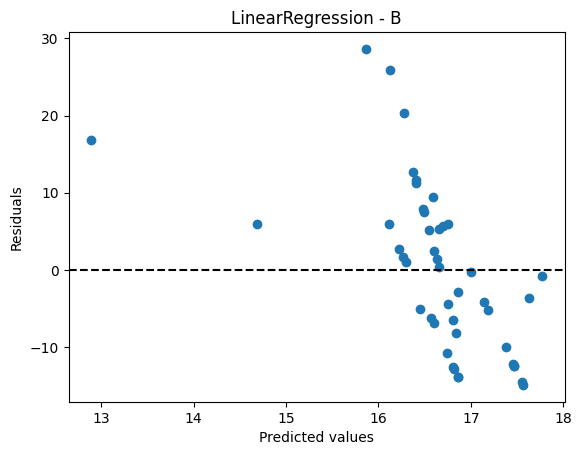

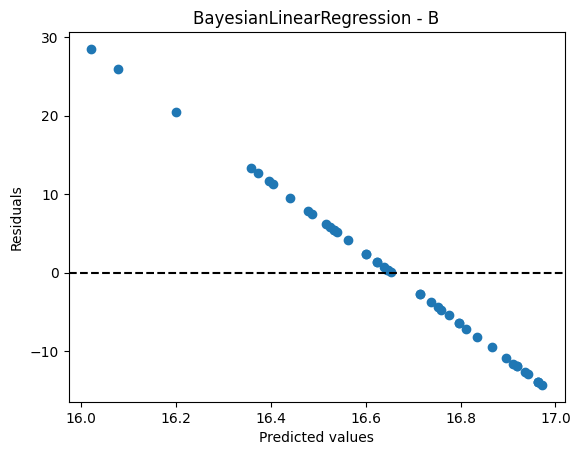

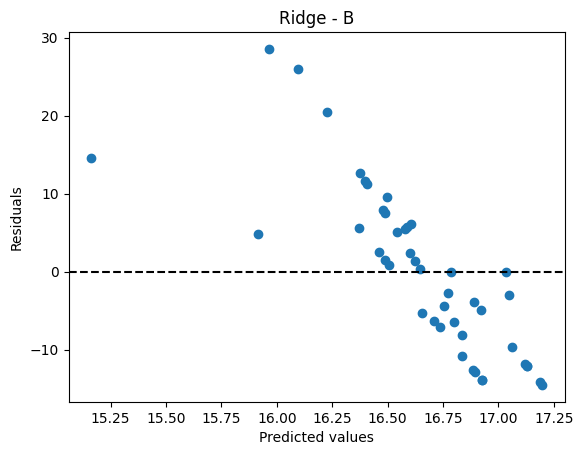

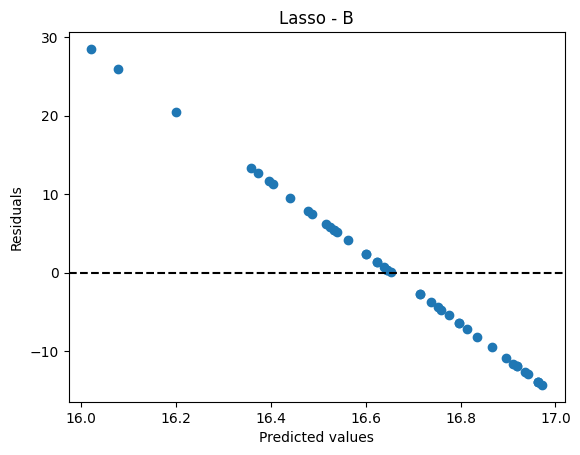

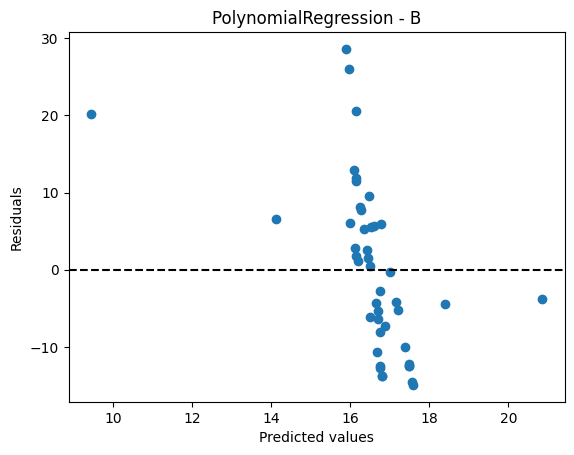

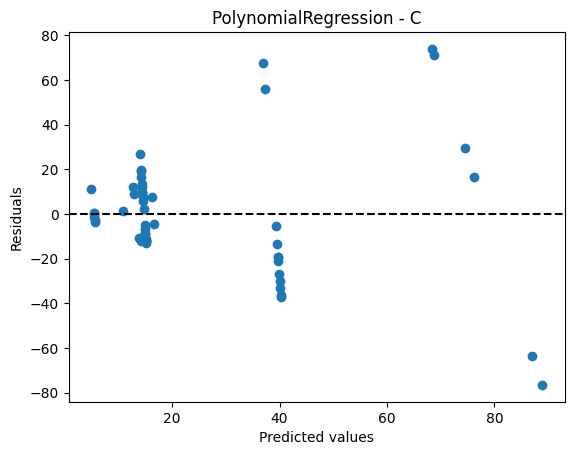

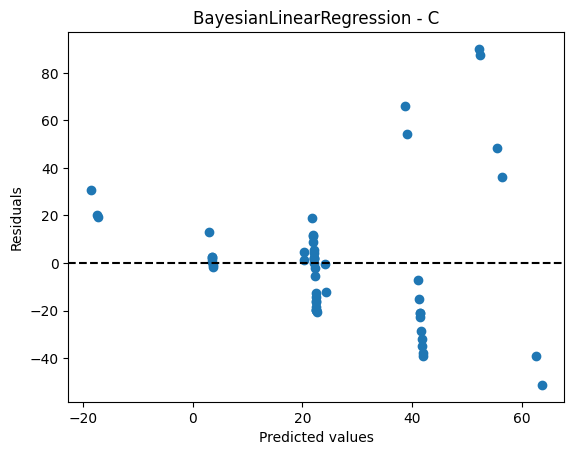

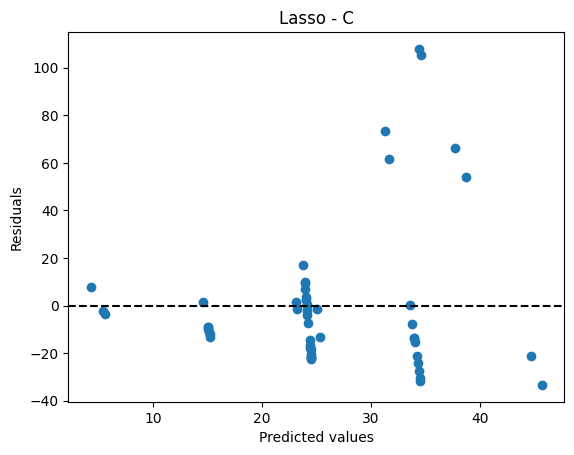

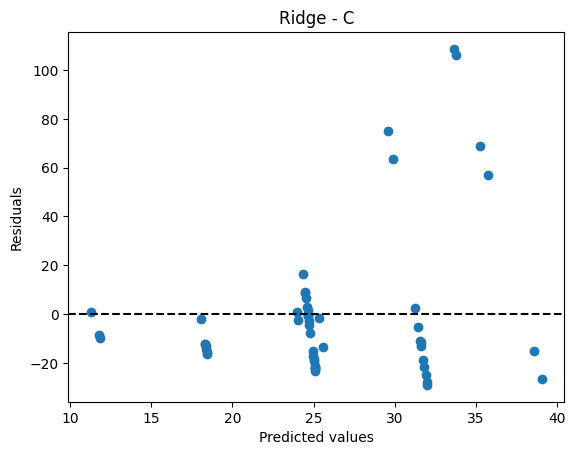

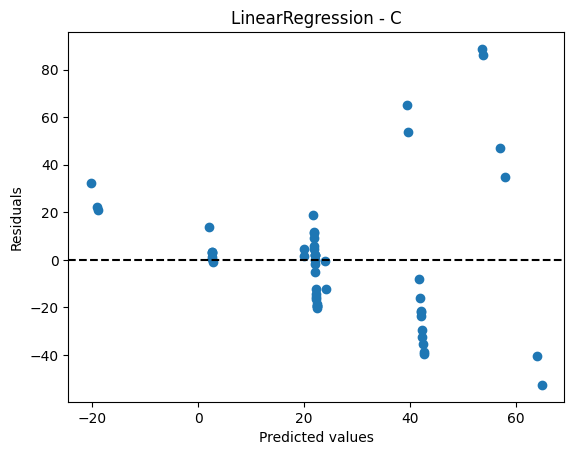

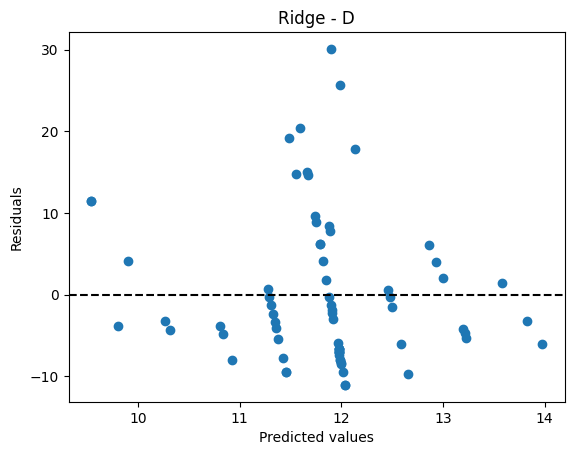

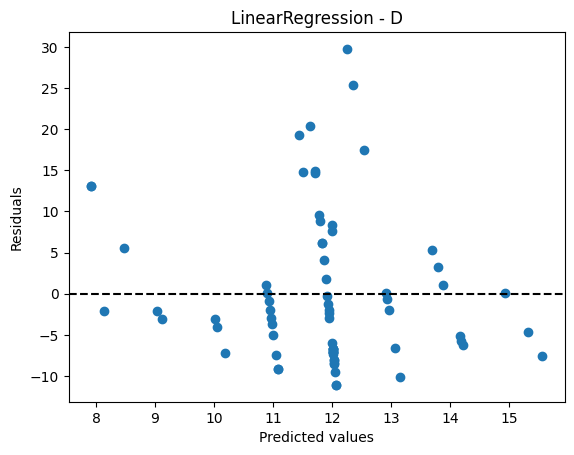

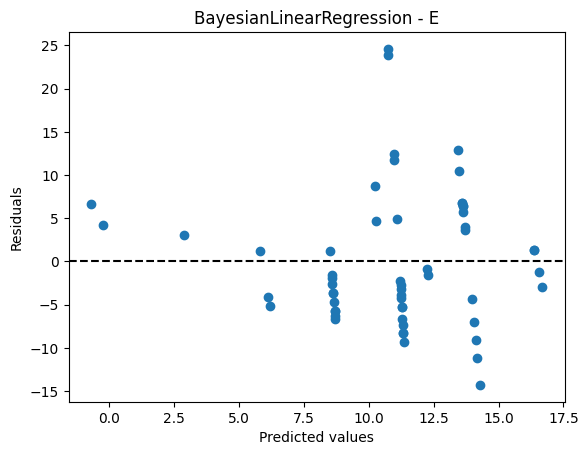

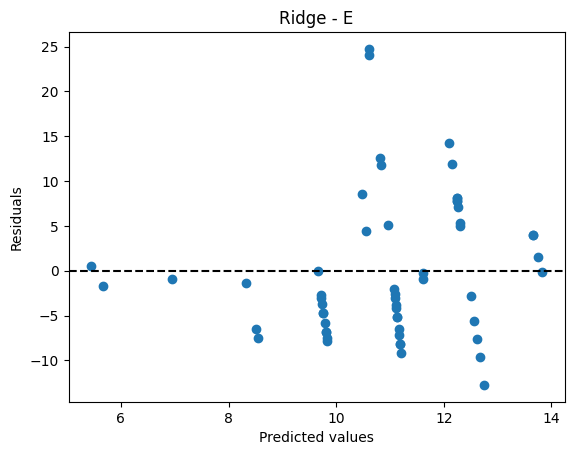

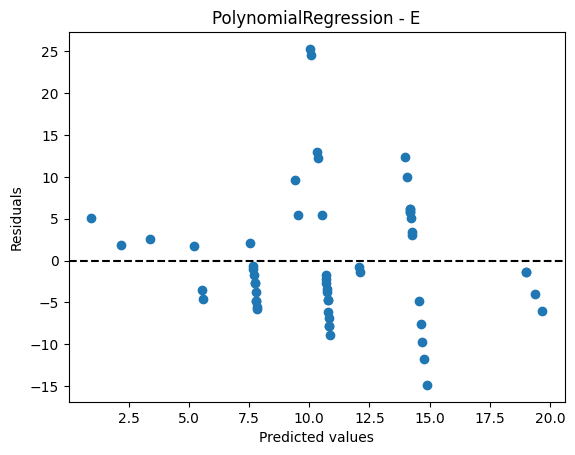

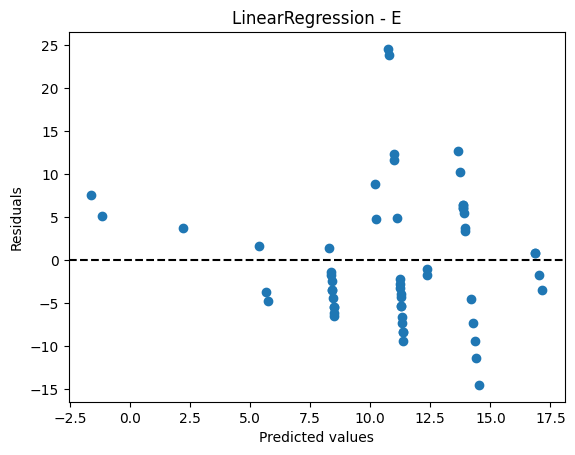

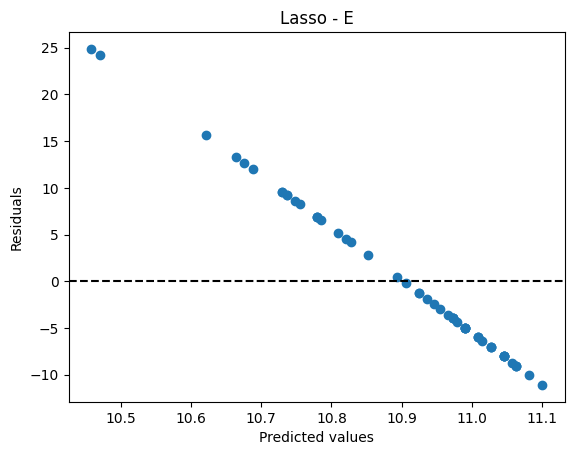

In [34]:
for site in df_results["Site"].unique():
    df_site = df_results[df_results["Site"] == site]
    for model in df_site["Model"].unique():
        df_model = df_site[df_site["Model"] == model]
        y_pred = df_model["y_pred"].values[0]
        residuals = df_model["Residuals"].values[0]
        plt.scatter(y_pred, residuals)
        plt.axhline(y=0.0, color="black", linestyle="--")
        plt.title(f"{model} - {site}")
        plt.xlabel("Predicted values")
        plt.ylabel("Residuals")
        plt.show()

##### Predicted vs Actual

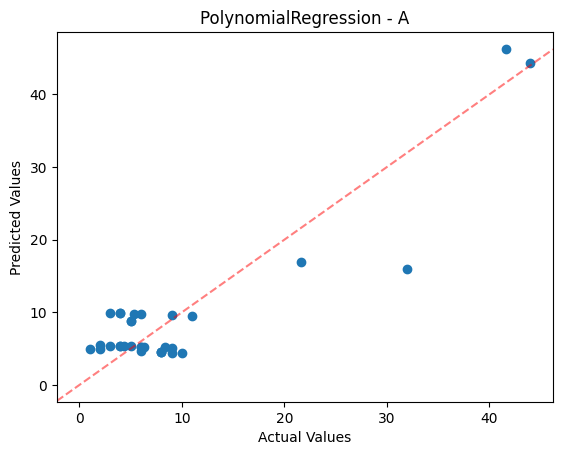

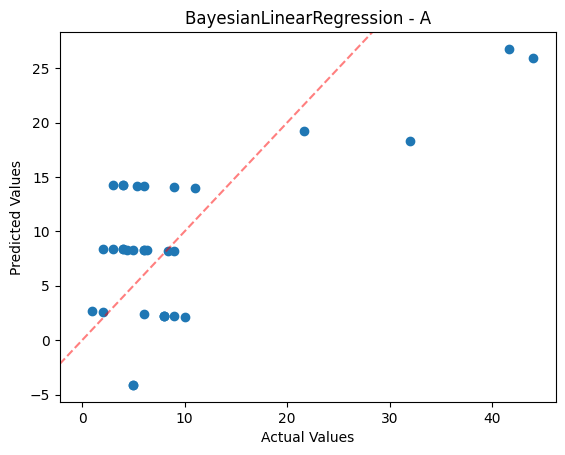

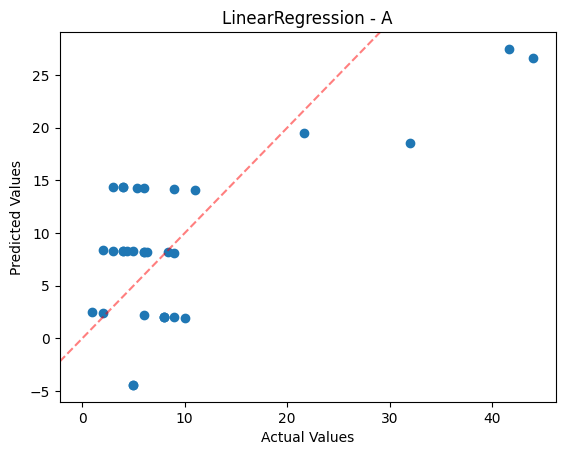

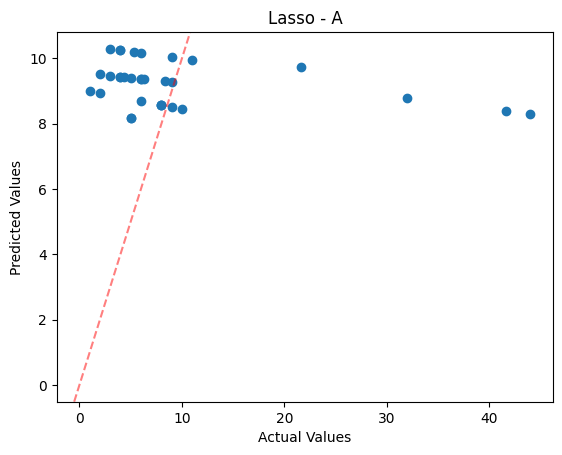

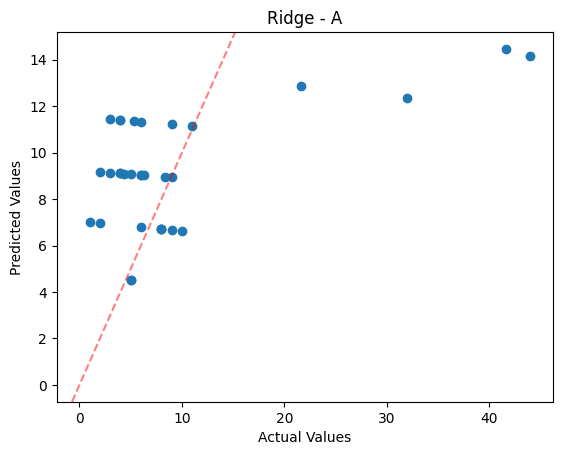

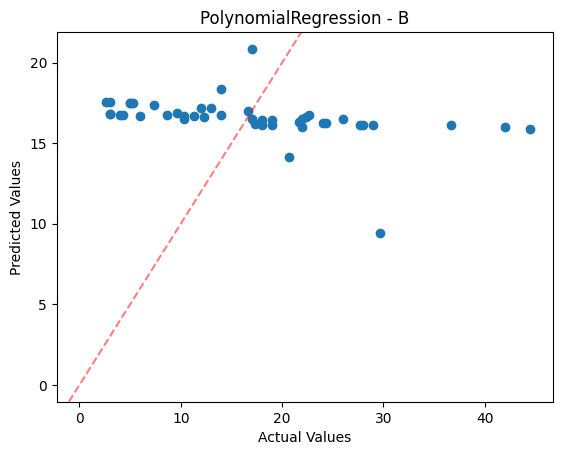

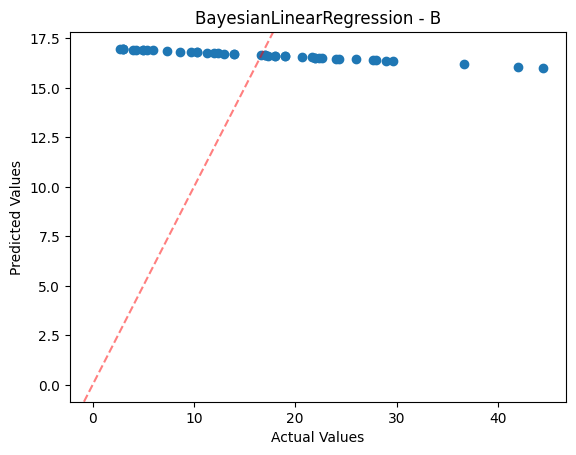

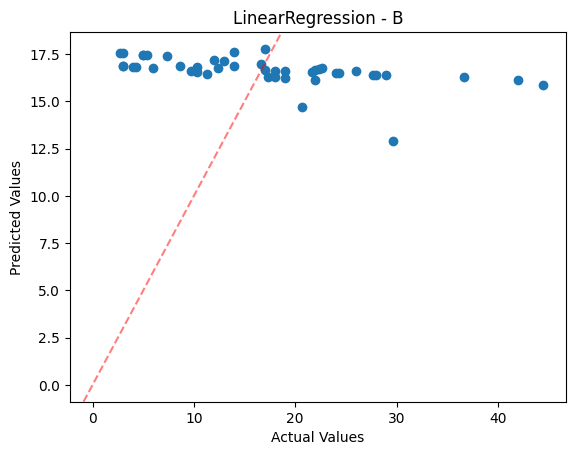

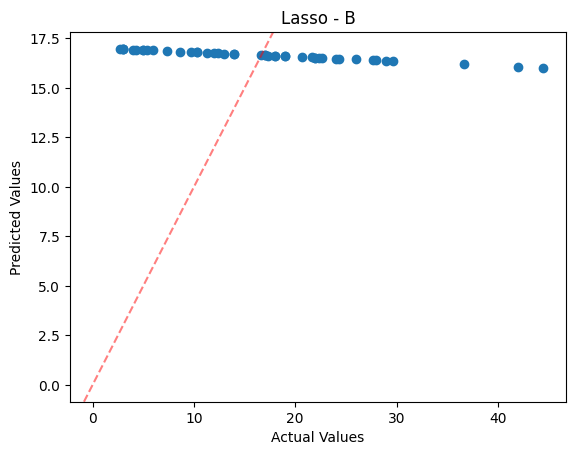

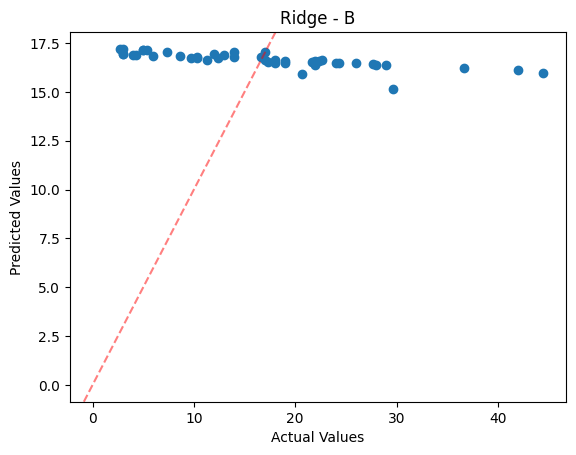

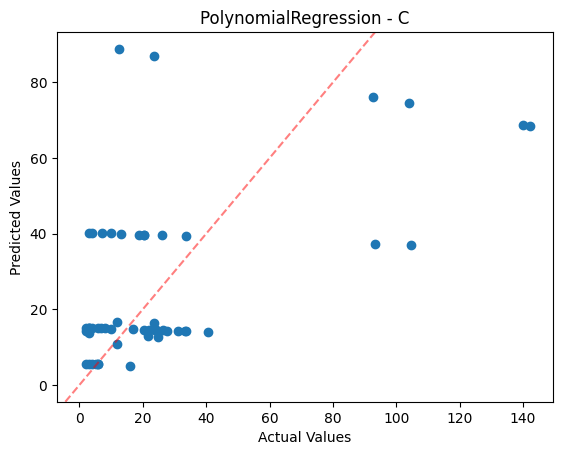

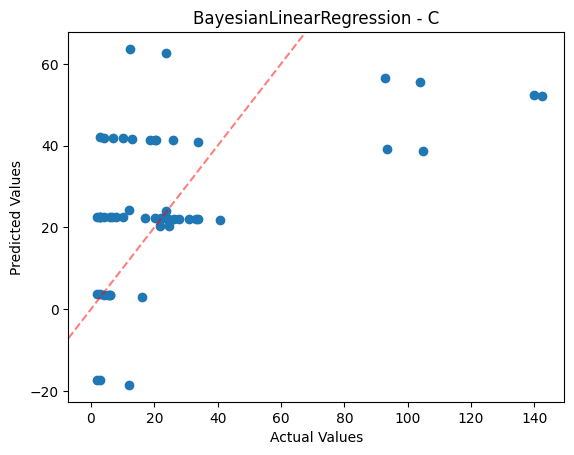

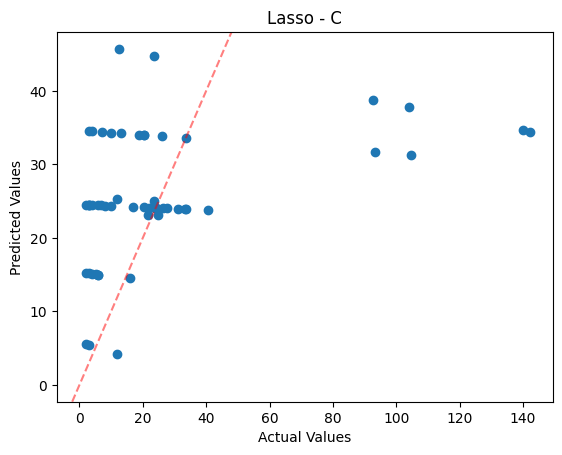

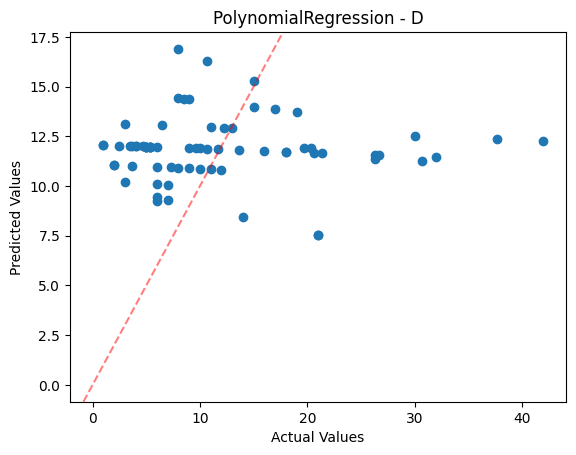

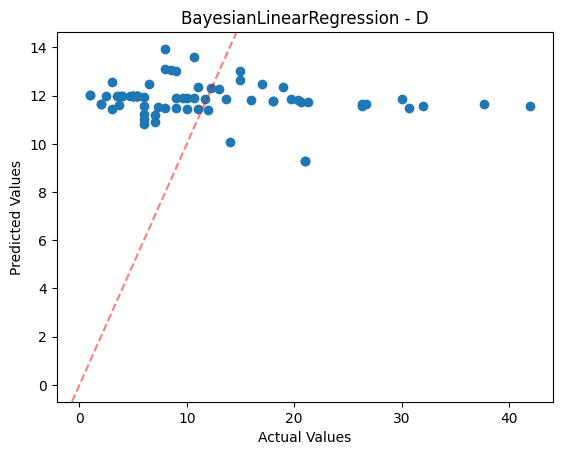

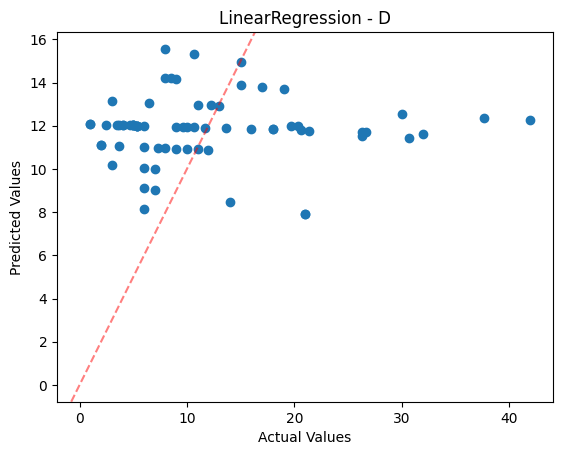

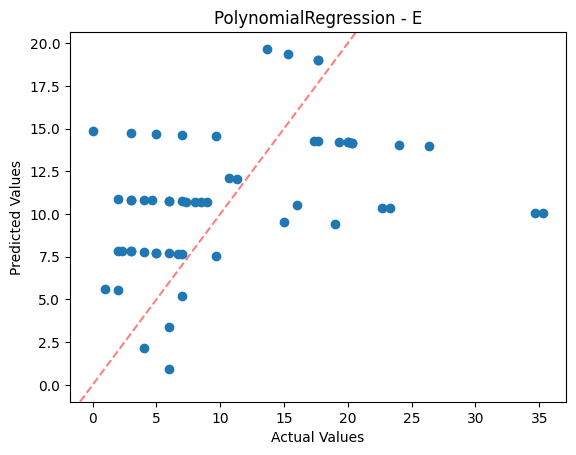

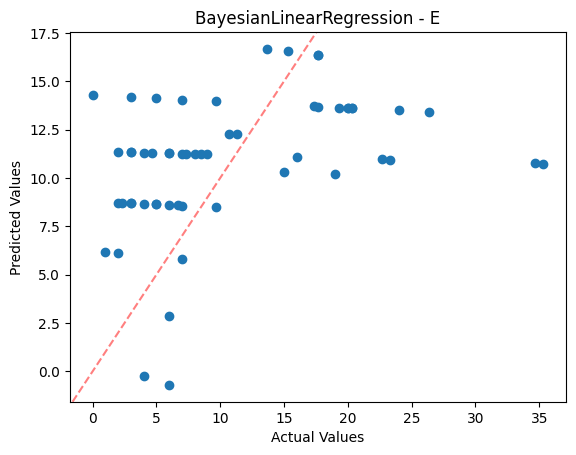

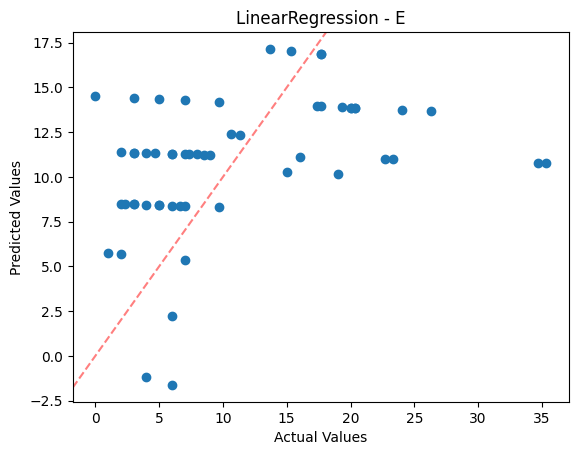

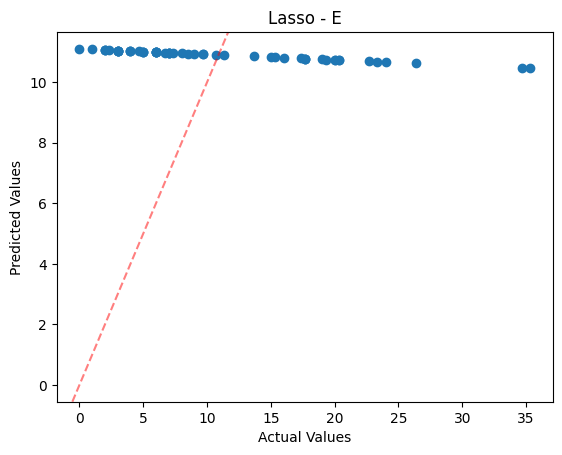

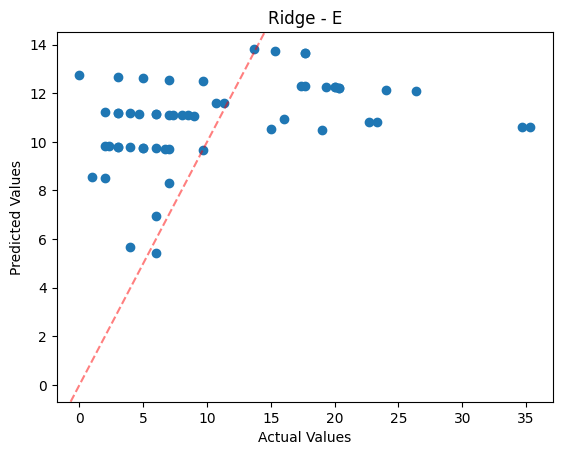

In [35]:
for site in df_results["Site"].unique():
    for model in df_results["Model"].unique():
        y_test = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_true"].values[0]
        y_pred = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_pred"].values[0]

        plt.scatter(y_test, y_pred)
        plt.axline([0, 0], [1, 1], color="red", linestyle="--", alpha=0.5)
        plt.title(f"{model} - {site}")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.show()

### Cond (ms)

In [36]:
cond_results = {}

In [37]:
X, y = (
    ecoli_df[["Site", "Cond (ms)_mean"]],
    ecoli_df[["Site", "Ecoli (1ml)_mean"]],
)

#### Linear Regression

In [38]:
cond_results["LinearRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # evaluate model
        yhat = lin_reg.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    cond_results["LinearRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Ridge Regression

In [39]:
cond_results["Ridge"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        ridge = Ridge()
        ridge.fit(X_train, y_train)
        # evaluate model
        yhat = ridge.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    cond_results["Ridge"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Lasso Regression

In [40]:
cond_results["Lasso"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lasso = Lasso()
        lasso.fit(X_train, y_train)
        # evaluate model
        yhat = lasso.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    cond_results["Lasso"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Bayesian Linear Regression

In [41]:
cond_results["BayesianLinearRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        bayeasian_ridge = BayesianRidge()
        bayeasian_ridge.fit(X_train, y_train)
        # evaluate model
        yhat = bayeasian_ridge.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    cond_results["BayesianLinearRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

#### Polynomial Regression

In [42]:
cond_results["PolynomialRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(X_site)
    poly_features = pd.DataFrame(poly_features)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(poly_features):
        # split data
        X_train, X_test = (
            poly_features.iloc[train_ix, :],
            poly_features.iloc[test_ix, :],
        )
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # evaluate model
        yhat = lin_reg.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    cond_results["PolynomialRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

#### Cond (ms) Results

In [43]:
rows = []

for model in cond_results.keys():
    for site in cond_results[model].keys():
        row = {
            "Model": model,
            "Site": site,
            "MSE": cond_results[model][site]["mse"],
            "R2": cond_results[model][site]["r2"],
            "Residuals": cond_results[model][site]["residuals"],
            "y_pred": cond_results[model][site]["y_pred"],
            "y_true": cond_results[model][site]["y_true"],
        }
        rows.append(row)

df_results = pd.DataFrame(rows)
df_results.sort_values(by=["Site"], inplace=True)

In [44]:
for site in df_results["Site"].unique():
    print(f"====================== Site: {site} ======================")
    for model in df_results["Model"].unique():
        print("MODEL:", model)
        y_test = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_true"].values[0]
        y_pred = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_pred"].values[0]
        regression_results(y_test, y_pred)
        print()

====================== Site: A ======================
MODEL: PolynomialRegression
r2:  0.7825
MAE:  3.093
MSE:  23.4156
RMSE:  4.839

MODEL: BayesianLinearRegression
r2:  0.5967
MAE:  4.8046
MSE:  43.4163
RMSE:  6.5891

MODEL: LinearRegression
r2:  0.5984
MAE:  4.8202
MSE:  43.225
RMSE:  6.5746

MODEL: Lasso
r2:  0.5418
MAE:  4.6569
MSE:  49.3201
RMSE:  7.0228

MODEL: Ridge
r2:  0.5909
MAE:  4.692
MSE:  44.0397
RMSE:  6.6362

====================== Site: B ======================
MODEL: PolynomialRegression
r2:  -0.1045
MAE:  8.7608
MSE:  116.1009
RMSE:  10.775

MODEL: BayesianLinearRegression
r2:  -0.046
MAE:  8.4309
MSE:  109.949
RMSE:  10.4857

MODEL: LinearRegression
r2:  -0.0704
MAE:  8.5939
MSE:  112.5156
RMSE:  10.6073

MODEL: Lasso
r2:  -0.046
MAE:  8.4308
MSE:  109.9477
RMSE:  10.4856

MODEL: Ridge
r2:  -0.0687
MAE:  8.5829
MSE:  112.3355
RMSE:  10.5988

====================== Site: C ======================
MODEL: PolynomialRegression
r2:  -0.139
MAE:  22.7946
MSE:  1265.4109
R

##### Estimated Functions

In [45]:
%% script false --no-raise-error

# plot each estimated function and the real data points for each site
for site in df_results["Site"].unique():
    for model in df_results["Model"].unique():

        if model == "PolynomialRegression":
            result_model_site = df_results[
                (df_results["Site"] == site) & (df_results["Model"] == model)
            ]

            coefficients = result_model_site["Coefficients"].values[0]
            intercept = result_model_site["Intercept"].values[0]

            x_est = np.linspace(0, 30, 100)
            y_est = intercept + coefficients[0] * x_est + coefficients[1] * x_est ** 2

            plt.plot(x_est, y_est, label=model)
            plt.scatter(X[X["Site"] == site]["Cond (ms)_mean"], y[y['Site'] == site]['Ecoli (1ml)_mean'], label="Real Data")
            plt.title(f"Site: {site} - {model}")
        else:
            result_model_site = df_results[
                (df_results["Site"] == site) & (df_results["Model"] == model)
            ]

            coefficients = result_model_site["Coefficients"].values[0]
            intercept = result_model_site["Intercept"].values[0]

            x_est = np.linspace(0, 30, 100)
            y_est = intercept + coefficients[0] * x_est

            plt.plot(x_est, y_est, label=model)
            plt.scatter(X[X["Site"] == site]["Cond (ms)_mean"], y[y['Site'] == site]['Ecoli (1ml)_mean'], label="Real Data")
            plt.title(f"Site: {site} - {model}")
        plt.show()
        print()

UsageError: Cell magic `%%` not found.


##### Residuals

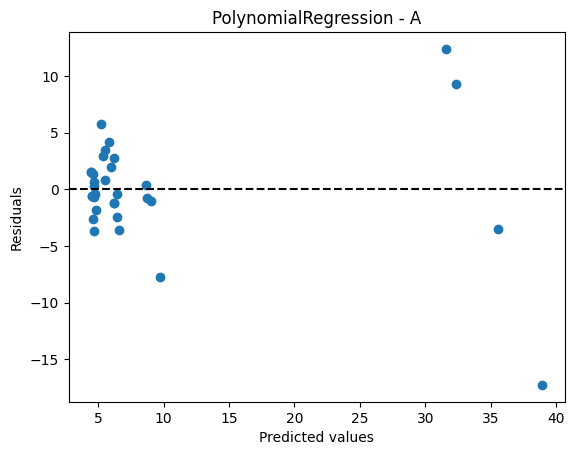

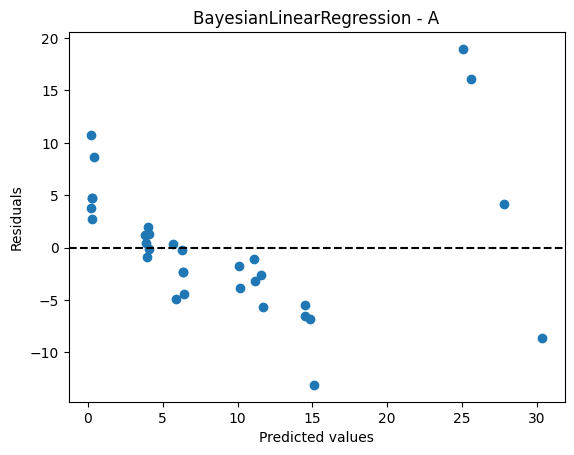

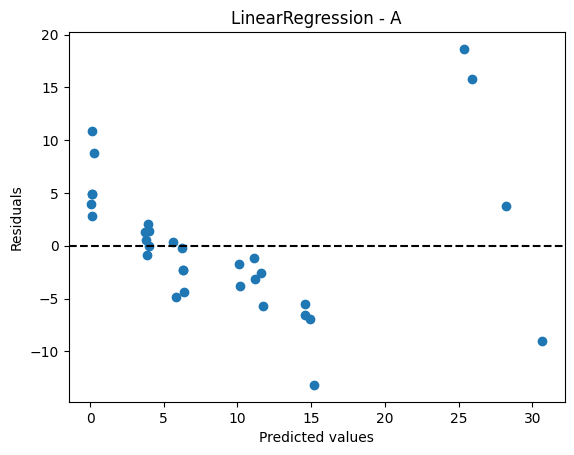

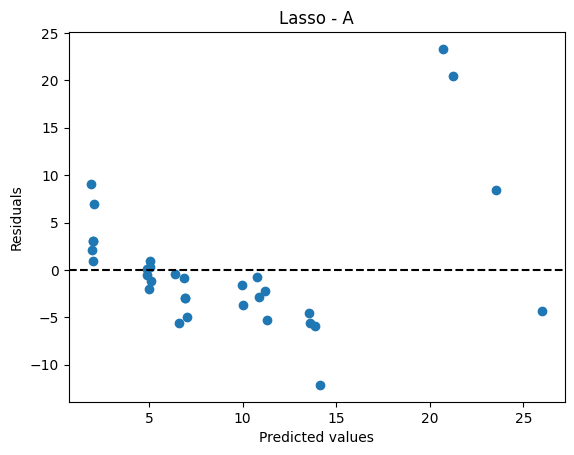

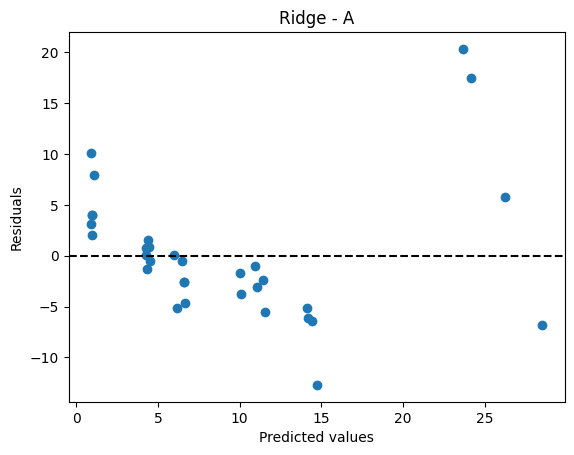

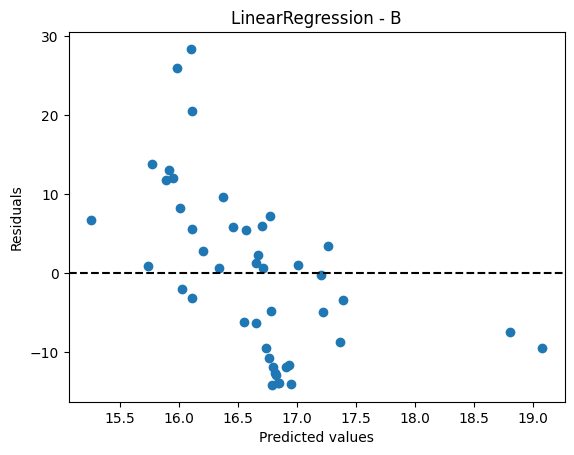

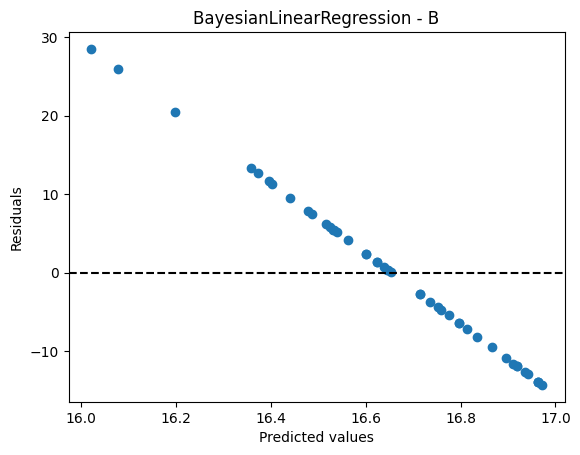

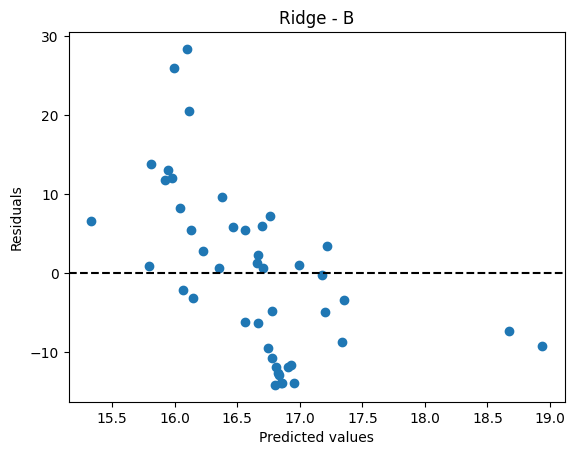

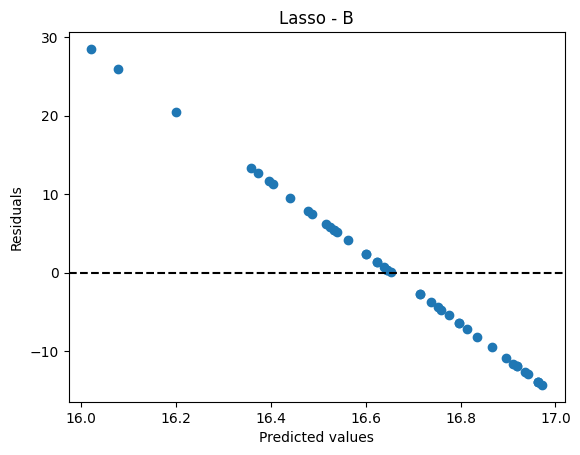

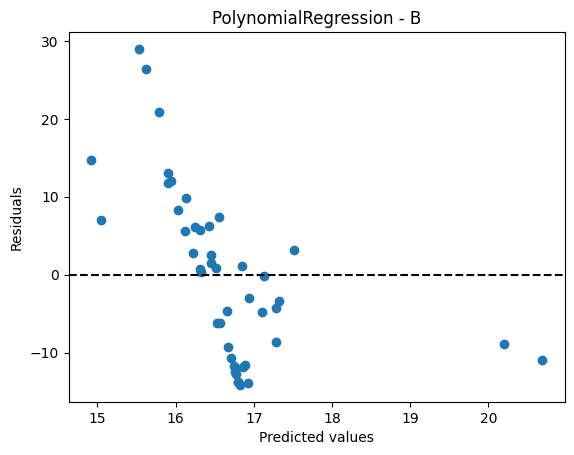

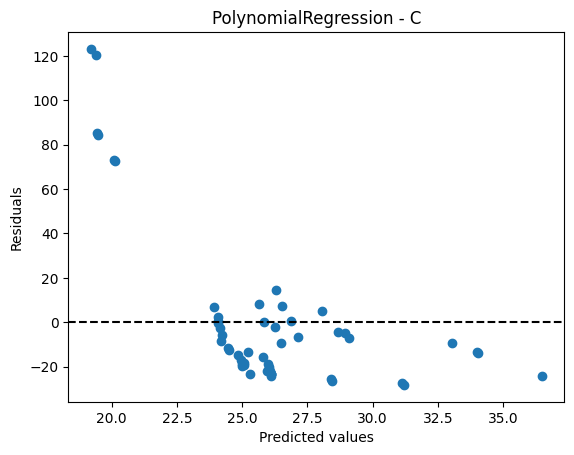

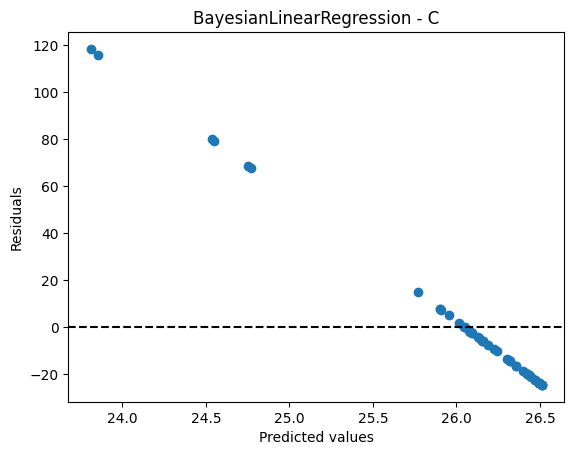

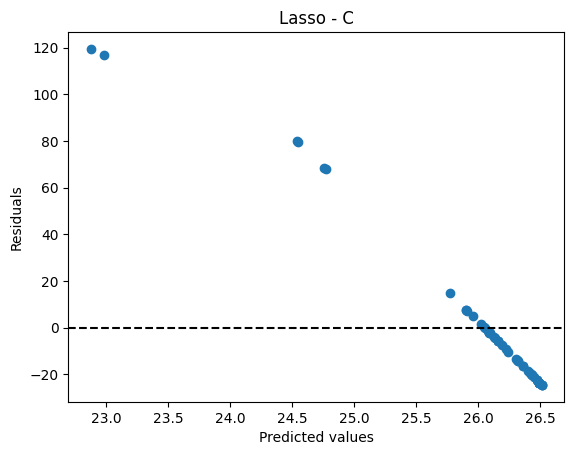

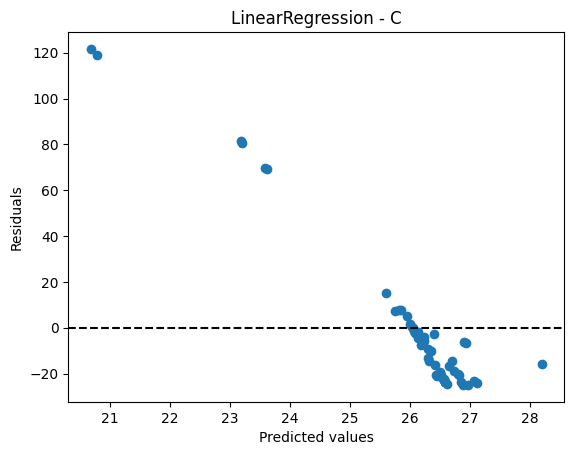

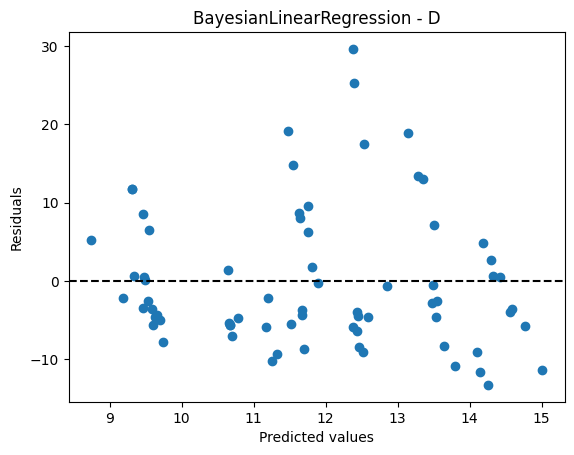

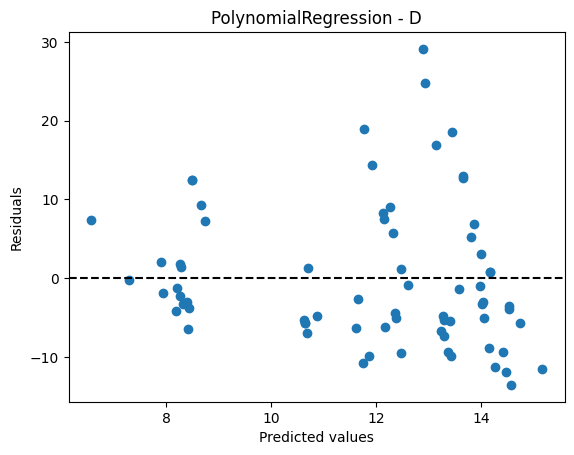

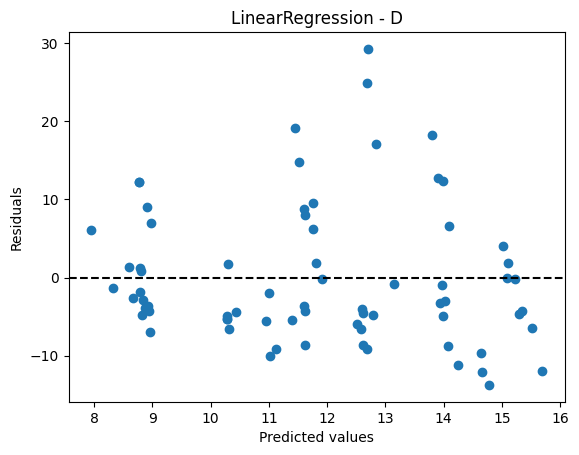

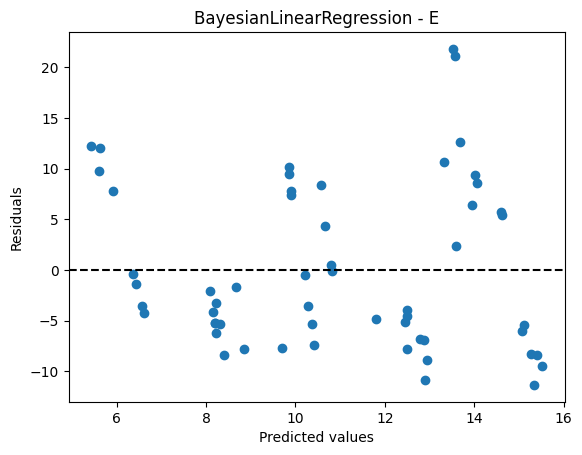

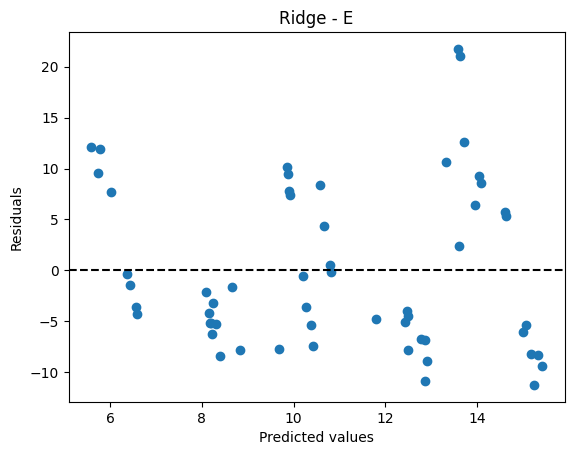

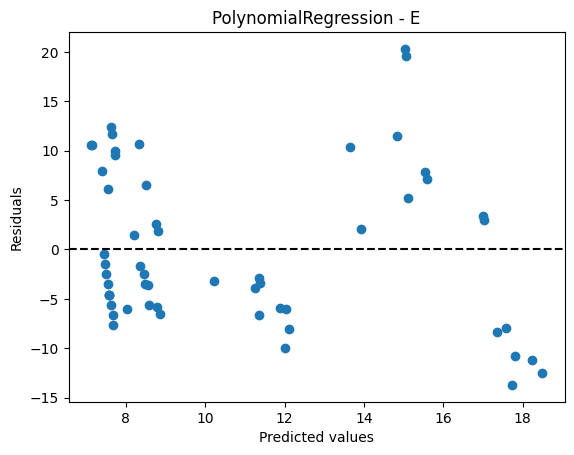

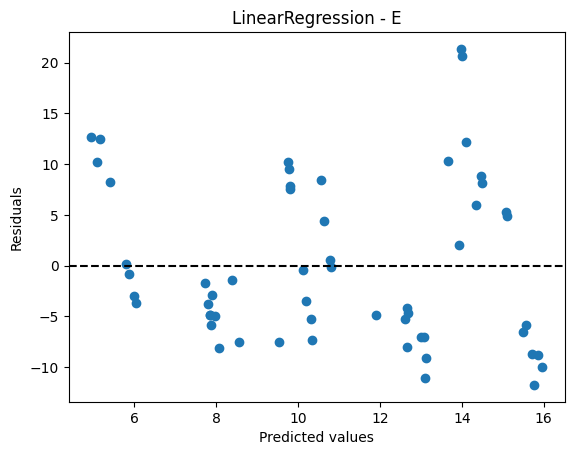

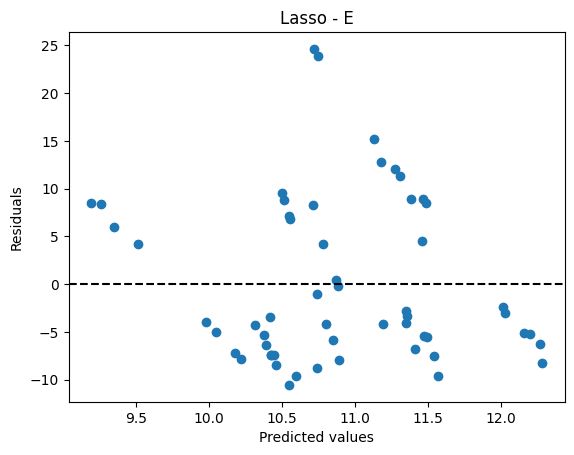

In [46]:
for site in df_results["Site"].unique():
    df_site = df_results[df_results["Site"] == site]
    for model in df_site["Model"].unique():
        df_model = df_site[df_site["Model"] == model]
        y_pred = df_model["y_pred"].values[0]
        residuals = df_model["Residuals"].values[0]
        plt.scatter(y_pred, residuals)
        plt.axhline(y=0.0, color="black", linestyle="--")
        plt.title(f"{model} - {site}")
        plt.xlabel("Predicted values")
        plt.ylabel("Residuals")
        plt.show()

##### Predicted vs Actual

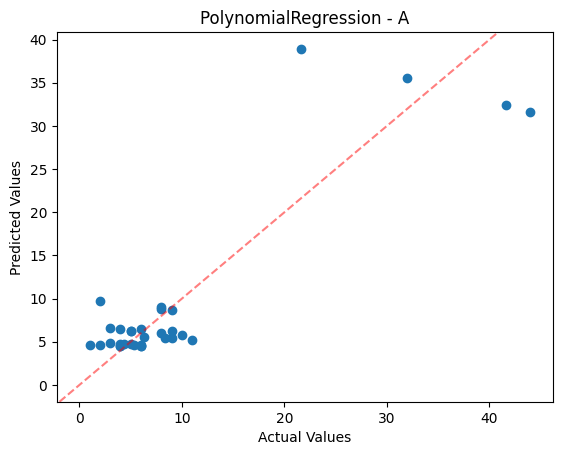

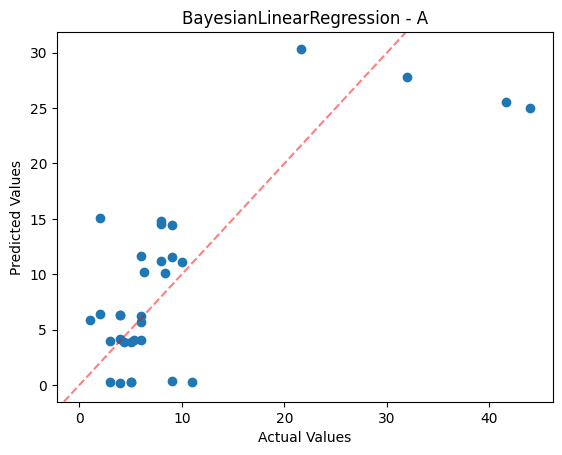

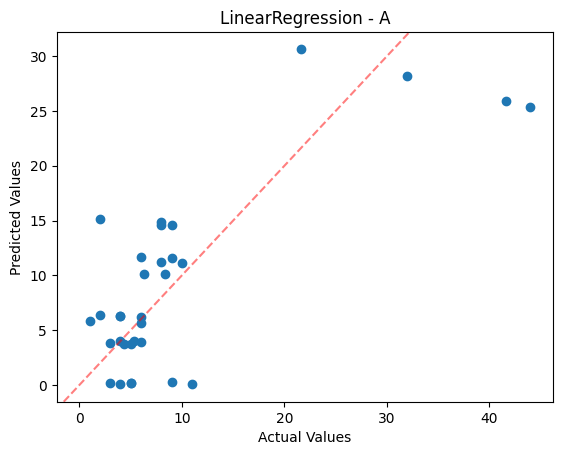

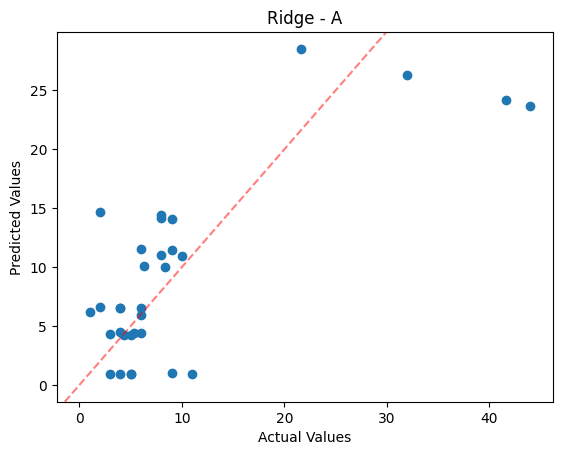

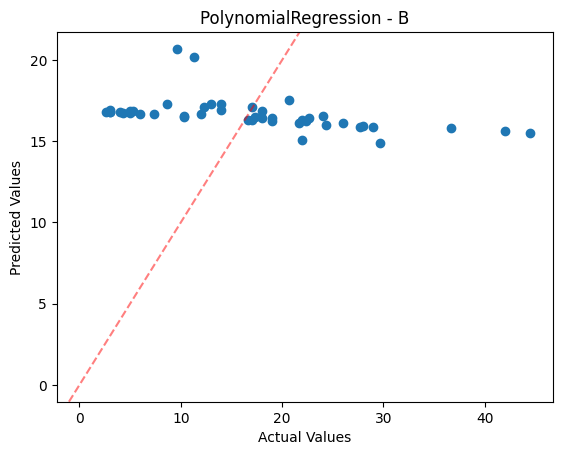

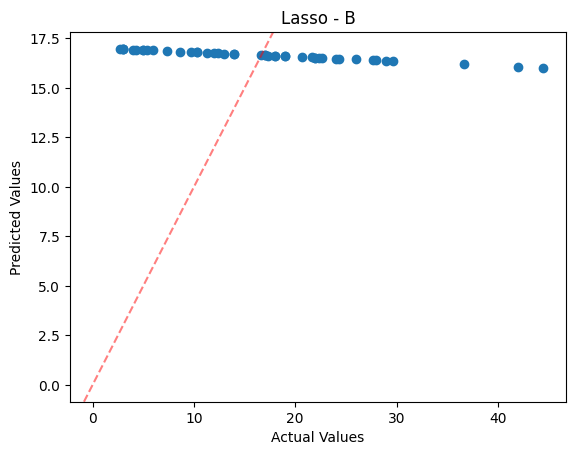

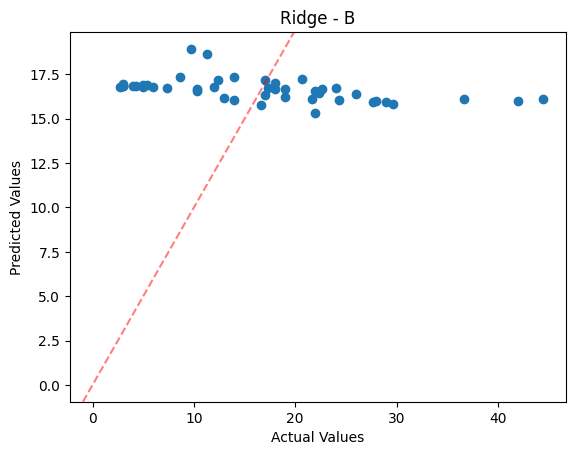

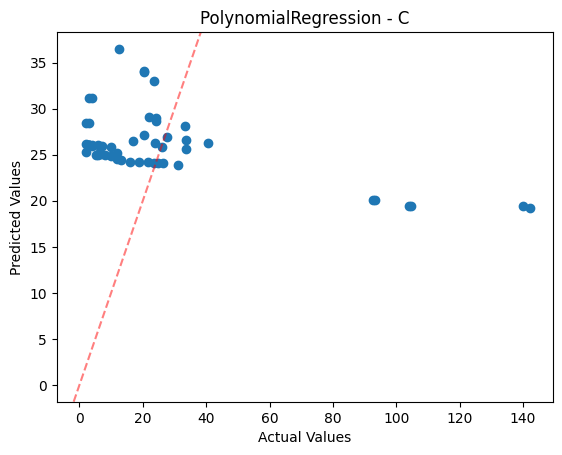

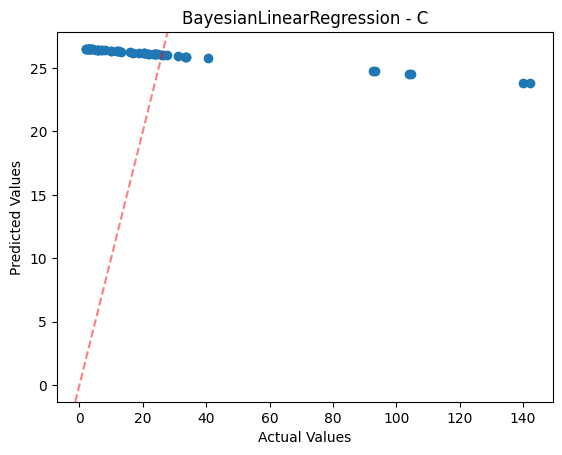

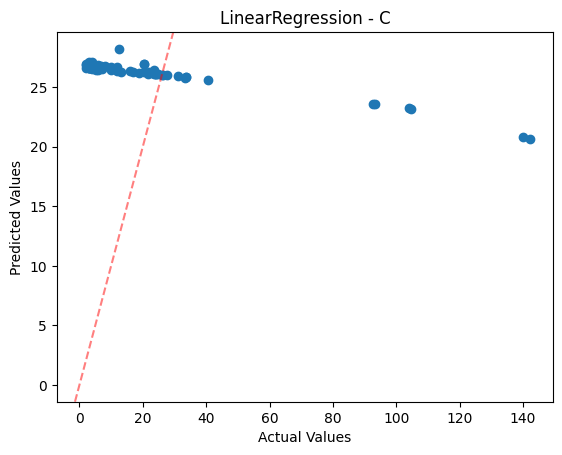

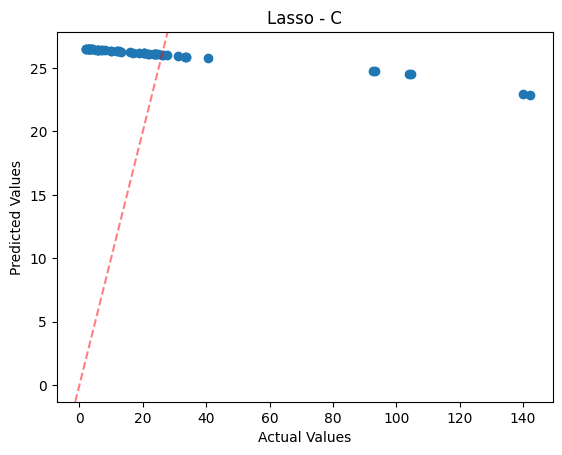

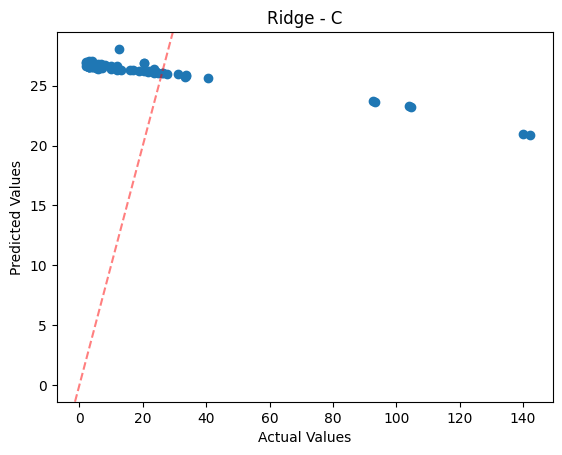

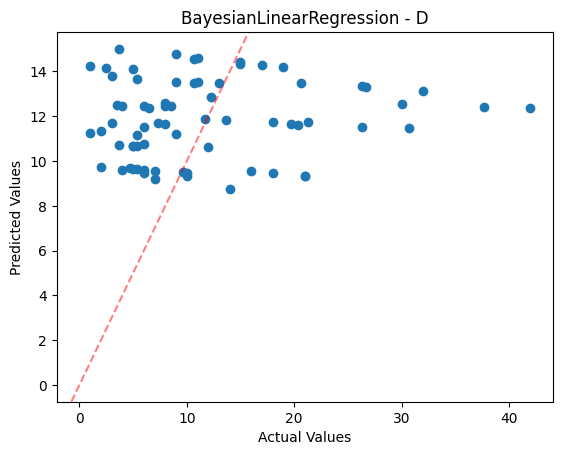

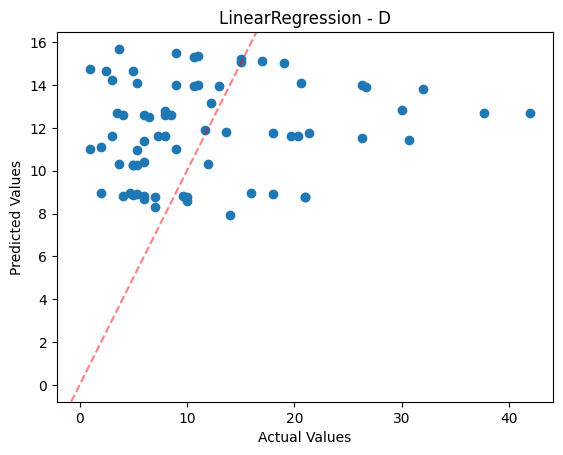

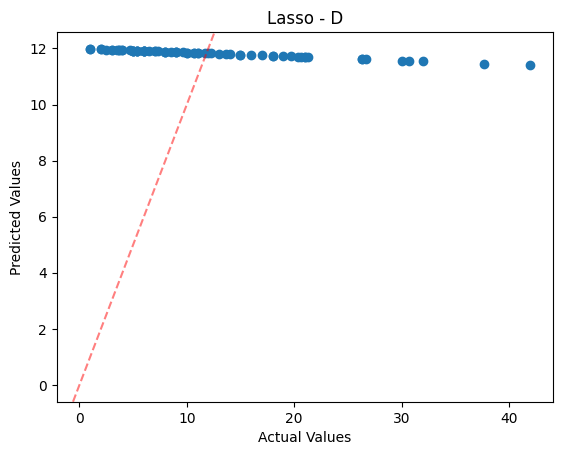

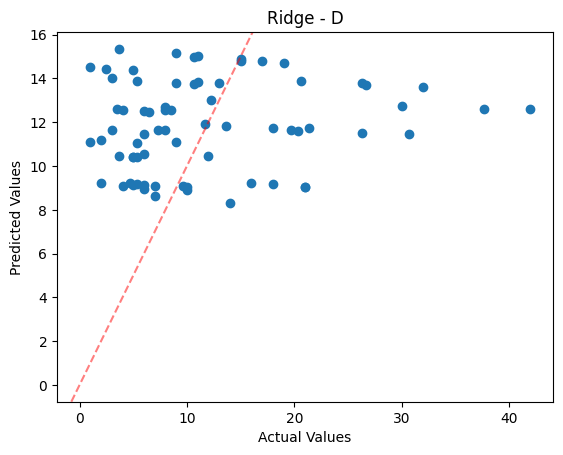

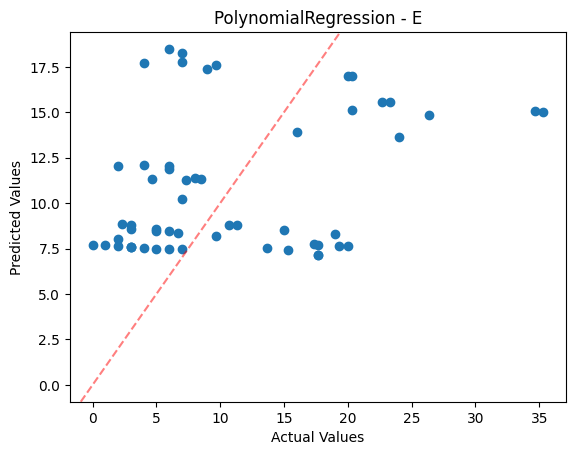

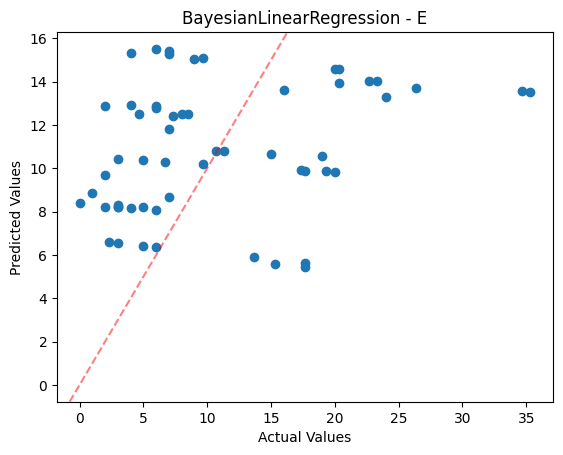

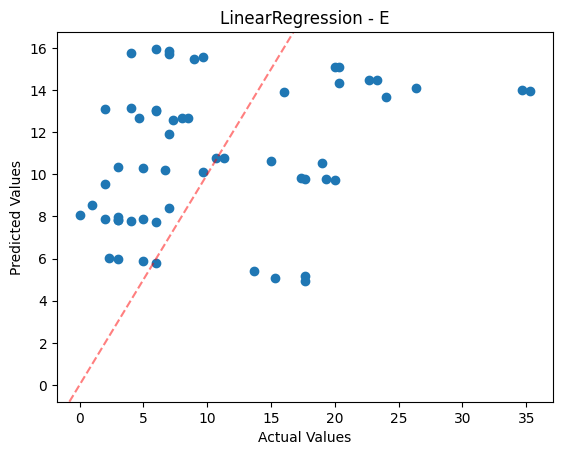

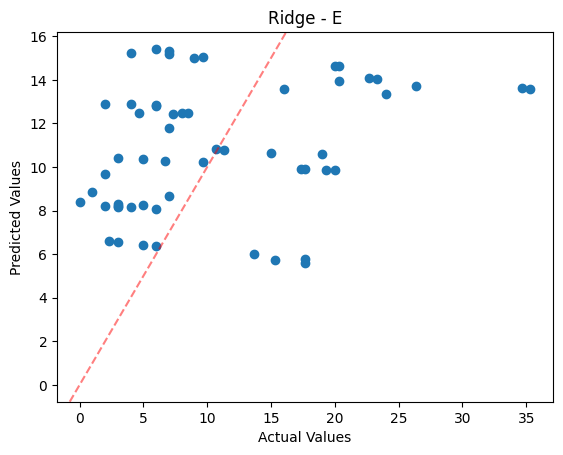

In [47]:
for site in df_results["Site"].unique():
    for model in df_results["Model"].unique():
        y_test = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_true"].values[0]
        y_pred = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_pred"].values[0]

        plt.scatter(y_test, y_pred)
        plt.axline([0, 0], [1, 1], color="red", linestyle="--", alpha=0.5)
        plt.title(f"{model} - {site}")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.show()

## Overall Relationship

In [48]:
results = {}

In [49]:
X, y = (
    ecoli_df.drop(columns=["Ecoli (1ml)_mean"]),
    ecoli_df[["Site", "Ecoli (1ml)_mean"]],
)
X = X[["Site", "Temp C_mean", "Ph_mean", "Cond (ms)_mean"]]

### Linear Regression

In [50]:
results["LinearRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # evaluate model
        yhat = lin_reg.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    results["LinearRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

### Ridge

In [51]:
results["Ridge"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        ridge = Ridge()
        ridge.fit(X_train, y_train)
        # evaluate model
        yhat = ridge.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    results["Ridge"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

### Lasso

In [52]:
results["Lasso"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lasso = Lasso()
        lasso.fit(X_train, y_train)
        # evaluate model
        yhat = lasso.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    results["Lasso"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

### Bayesian Linear Regression

In [53]:
results["BayesianLinearRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_site):
        # split data
        X_train, X_test = X_site.iloc[train_ix, :], X_site.iloc[test_ix, :]
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        bayesian_ridge = BayesianRidge()
        bayeasian_ridge.fit(X_train, y_train)
        # evaluate model
        yhat = bayeasian_ridge.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    results["BayesianLinearRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

### Polynomial Regression

In [54]:
results["PolynomialRegression"] = {}

for site in X["Site"].unique():
    X_site = X[X["Site"] == site]
    X_site.drop(columns=["Site"], inplace=True)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(X_site)
    poly_features = pd.DataFrame(poly_features)

    y_site = y[y["Site"] == site]
    y_site.drop(columns=["Site"], inplace=True)

    # create loocv procedure
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(poly_features):
        # split data
        X_train, X_test = (
            poly_features.iloc[train_ix, :],
            poly_features.iloc[test_ix, :],
        )
        y_train, y_test = y_site.iloc[train_ix], y_site.iloc[test_ix]
        # fit model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        # evaluate model
        yhat = lin_reg.predict(X_test)
        # store
        y_true.append(y_test.iloc[0].values[0])
        y_pred.append(yhat[0][0])

    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    residuals = np.array(y_true) - np.array(y_pred)

    results["PolynomialRegression"][site] = {
        "mse": mse,
        "rmse": rmse,
        "r2": r2,
        "residuals": residuals,
        "y_pred": y_pred,
        "y_true": y_true,
    }

### Results

In [55]:
rows = []

for model in results.keys():
    for site in results[model].keys():
        row = {
            "Model": model,
            "Site": site,
            "MSE": results[model][site]["mse"],
            "R2": results[model][site]["r2"],
            "Residuals": results[model][site]["residuals"],
            "y_pred": results[model][site]["y_pred"],
            "y_true": results[model][site]["y_true"],
        }
        rows.append(row)

df_results = pd.DataFrame(rows)
df_results.sort_values(by=["Site"], inplace=True)

In [56]:
df_results

Model Site          MSE        R2  \
24      PolynomialRegression    A    12.413482  0.884676   
19  BayesianLinearRegression    A    27.020062  0.748979   
4           LinearRegression    A    26.096031  0.757563   
14                     Lasso    A    49.680135  0.538463   
9                      Ridge    A    35.303883  0.672020   
3           LinearRegression    B   117.609386 -0.118860   
18  BayesianLinearRegression    B   110.172277 -0.048108   
8                      Ridge    B   113.960077 -0.084142   
13                     Lasso    B   110.498513 -0.051211   
23      PolynomialRegression    B   151.307220 -0.439439   
22      PolynomialRegression    C  1262.517513 -0.136445   
17  BayesianLinearRegression    C  1154.084820 -0.038840   
12                     Lasso    C   955.775554  0.139666   
7                      Ridge    C   994.651955  0.104672   
2           LinearRegression    C   812.535264  0.268603   
10                     Lasso    D    83.807044 -0.035774   
15  BayesianLinearRegression    D    84.180272 -0.040387   
5                      Ridge    D    81.792998 -0.010883   
20      PolynomialRegression    D    82.962405 -0.025335   
0           LinearRegression    D    82.909704 -0.024684   
16  BayesianLinearRegression    E    76.193163 -0.079527   
6                      Ridge    E    53.659807  0.239732   
21      PolynomialRegression    E    55.407689  0.214968   
1           LinearRegression    E    48.252468  0.316345   
11                     Lasso    E    73.437350 -0.040482   

                                            Residuals  \
24  [2.6993282518860724, 5.077173181757644, 0.4459...   
19  [1.411294836139291, 3.6055046335990824, 10.548...   
4   [1.9251571849853235, 4.101589752143411, 11.057...   
14  [-2.8503708819853415, -0.7834016281790905, 3.0...   
9   [-1.171572742835167, 0.933800572795846, 5.4054...   
3   [3.8186206448391715, 9.45496745393288, 26.4010...   
18  [-2.6822027247504643, 2.505815590851343, 28.47...   
8   [4.955970144945859, 11.930887482405364, 27.263...   
13  [2.050696259972364, 8.216931105466537, 28.1797...   
23  [-20.23899518856956, 30.865468848399814, 33.12...   
22  [-146.35198324204248, 133.68865980733244, 1.57...   
17  [-10.247121886917924, -14.327845410648965, -1....   
12  [-9.64669700089928, 0.09198764882785326, -2.29...   
7   [-15.479798440119225, -11.543778635517015, -3....   
2   [-9.651011800027618, 24.510699279077244, -8.55...   
10  [-4.169745180023698, -4.169745180023698, -5.59...   
15  [-5.8856496898203865, -5.885670188798727, -6.9...   
5   [-3.1328570938790143, -2.9043908047324862, -4....   
20  [-13.415534593170378, -4.220072029520452, -7.5...   
0   [-3.0776572488608096, -2.8665601654093003, -4....   
16  [5.187275557520236, 13.342911478159934, -8.642...   
6   [2.201765023878849, 10.667554142568335, -9.305...   
21  [-0.05493039346174555, 6.58994983685443, -8.14...   
1   [1.364601518832103, 7.691984319851315, -8.3341...   
11  [4.543346839167864, 13.175738360522612, -7.003...   

                                               y_pred  \
24  [5.300671748113928, 4.922826818242356, 4.55403...   
19  [6.588705163860709, 6.394495366400918, -5.5480...   
4   [6.0748428150146765, 5.898410247856589, -6.057...   
14  [10.850370881985341, 10.78340162817909, 1.9883...   
9   [9.171572742835167, 9.066199427204154, -0.4054...   
3   [10.181379355160828, 7.5450325460671195, 18.09...   
18  [16.682202724750464, 14.494184409148657, 16.02...   
8   [9.044029855054141, 5.069112517594636, 17.2363...   
13  [11.949303740027636, 8.783068894533463, 16.320...   
23  [34.23899518856956, -13.865468848399814, 11.37...   
22  [162.35198324204248, -121.68865980733244, 22.6...   
17  [26.247121886917924, 26.327845410648965, 26.08...   
12  [25.64669700089928, 11.908012351172147, 26.543...   
7   [31.479798440119225, 23.543778635517015, 28.17...   
2   [25.651011800027618, -12.510699279077244, 32.8...   
10  [10.169745180023698, 10.169745180023698, 10.59...   
15  [11.88

In [57]:
for site in df_results["Site"].unique():
    print(f"====================== Site: {site} ======================")
    for model in df_results["Model"].unique():
        print("MODEL:", model)
        y_test = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_true"].values[0]
        y_pred = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_pred"].values[0]
        regression_results(y_test, y_pred)
        print()

====================== Site: A ======================
MODEL: PolynomialRegression
r2:  0.8847
MAE:  2.5404
MSE:  12.4135
RMSE:  3.5233

MODEL: BayesianLinearRegression
r2:  0.749
MAE:  3.9657
MSE:  27.0201
RMSE:  5.1981

MODEL: LinearRegression
r2:  0.7576
MAE:  3.9039
MSE:  26.096
RMSE:  5.1084

MODEL: Lasso
r2:  0.5385
MAE:  4.6769
MSE:  49.6801
RMSE:  7.0484

MODEL: Ridge
r2:  0.672
MAE:  4.2438
MSE:  35.3039
RMSE:  5.9417

====================== Site: B ======================
MODEL: PolynomialRegression
r2:  -0.4394
MAE:  9.5854
MSE:  151.3072
RMSE:  12.3007

MODEL: BayesianLinearRegression
r2:  -0.0481
MAE:  8.4811
MSE:  110.1723
RMSE:  10.4963

MODEL: LinearRegression
r2:  -0.1189
MAE:  8.9172
MSE:  117.6094
RMSE:  10.8448

MODEL: Lasso
r2:  -0.0512
MAE:  8.525
MSE:  110.4985
RMSE:  10.5118

MODEL: Ridge
r2:  -0.0841
MAE:  8.7731
MSE:  113.9601
RMSE:  10.6752

====================== Site: C ======================
MODEL: PolynomialRegression
r2:  -0.1364
MAE:  22.9725
MSE:  1262.5

#### Coefficients plots

In [58]:
%% script false --no-raise-error

for site in df_results["Site"].unique():
    df_site = df_results[df_results["Site"] == site]
    for model in df_site["Model"].unique():
        df_model = df_site[df_site["Model"] == model]
        x_axis = range(len(df_model["Coefficients"].values[0]))
        plt.figure(figsize=(5, 2))
        plt.bar(x_axis, df_model["Coefficients"].values[0])
        plt.title(f"{model} - {site}")
        plt.show()

UsageError: Cell magic `%%` not found.


#### Residuals

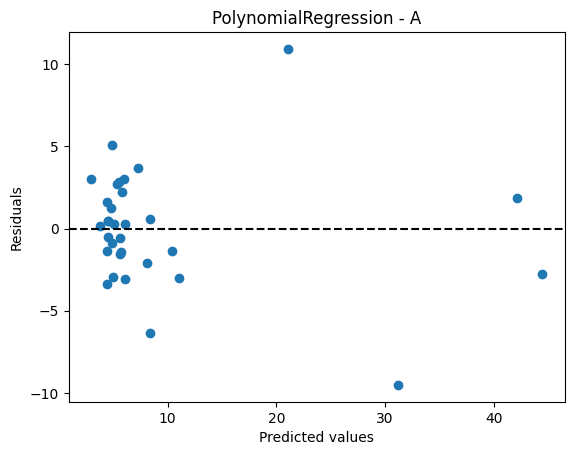

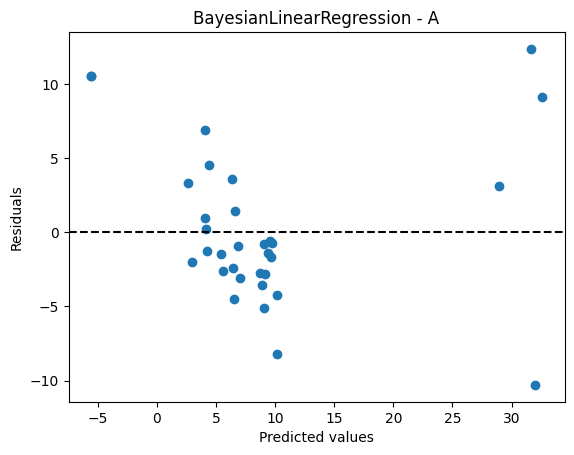

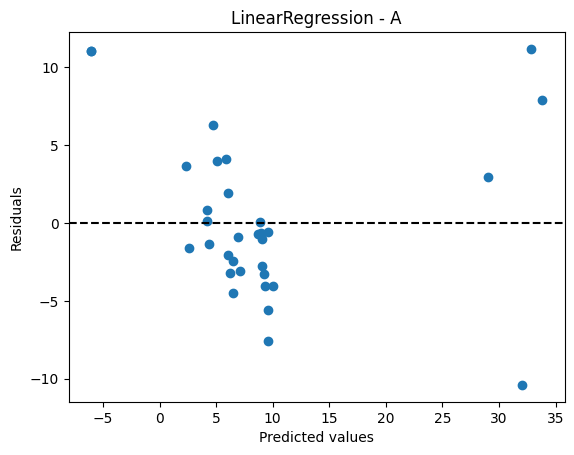

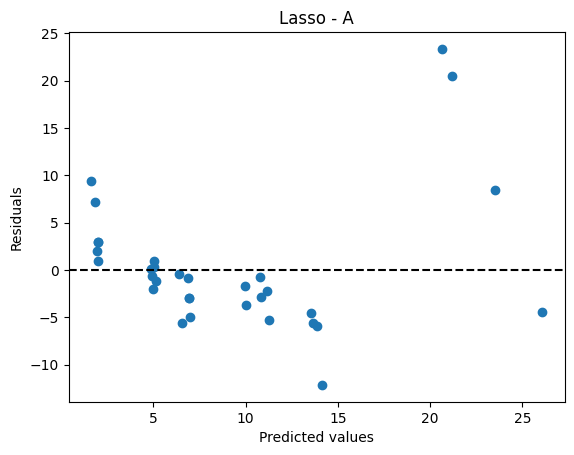

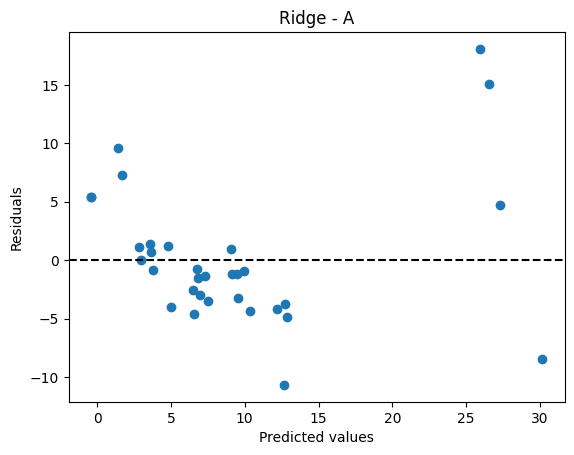

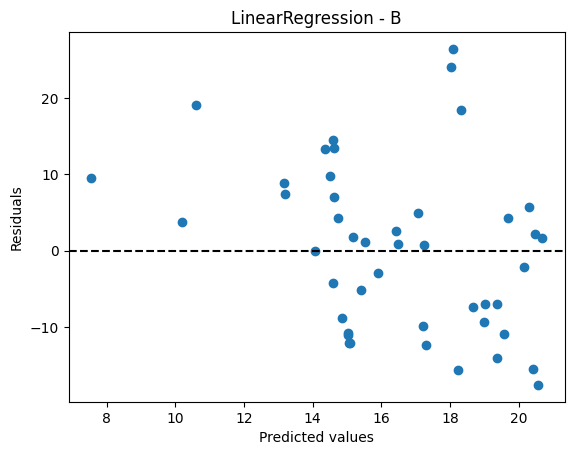

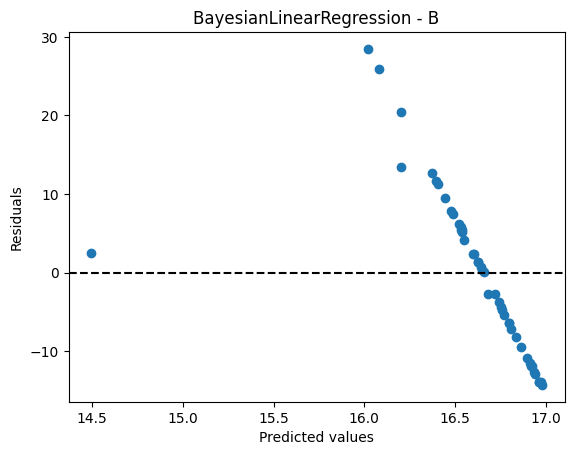

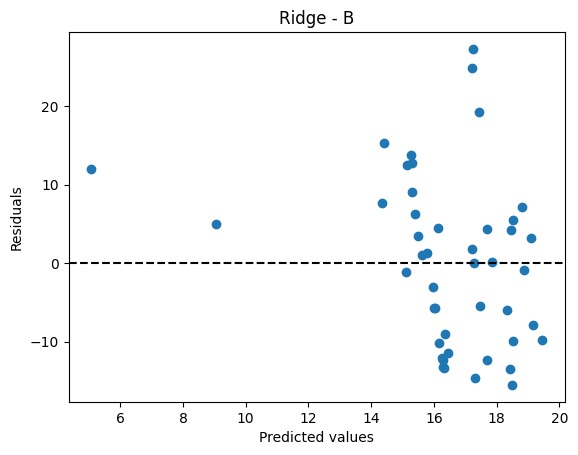

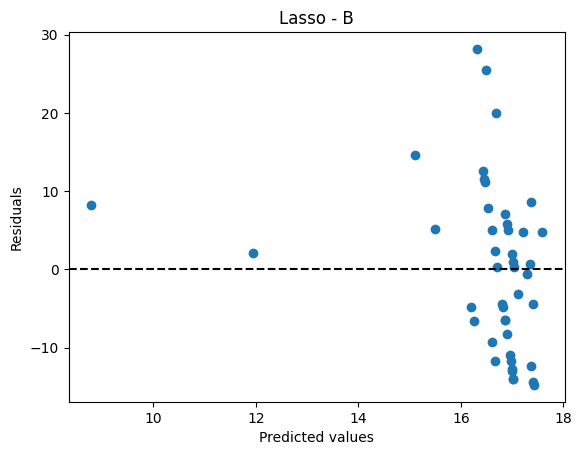

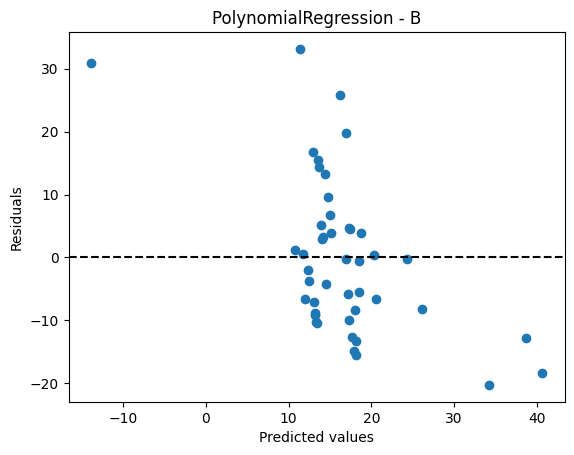

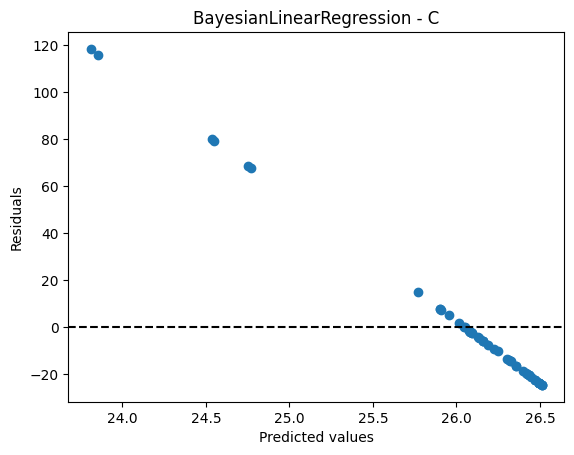

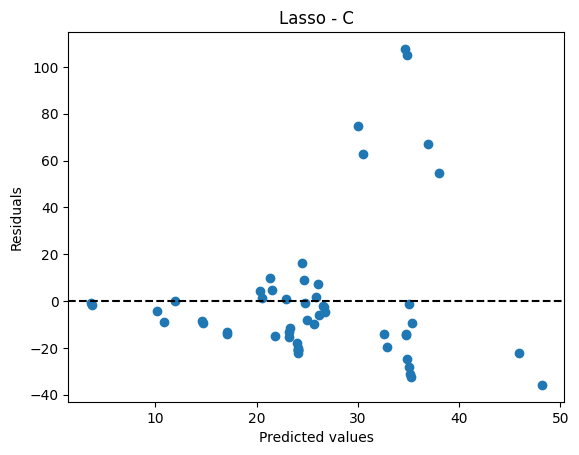

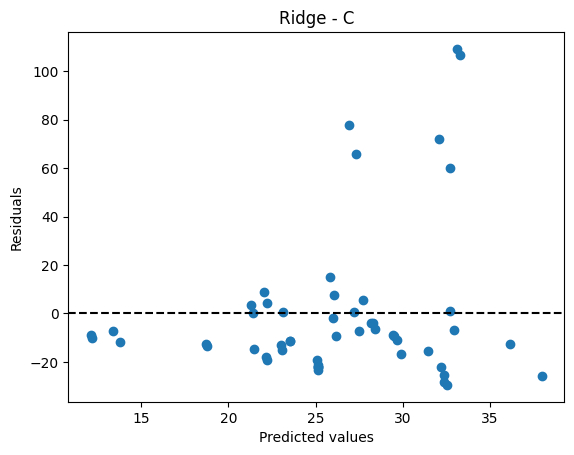

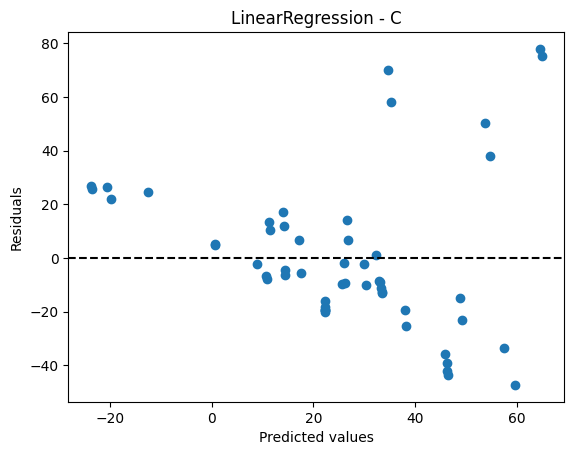

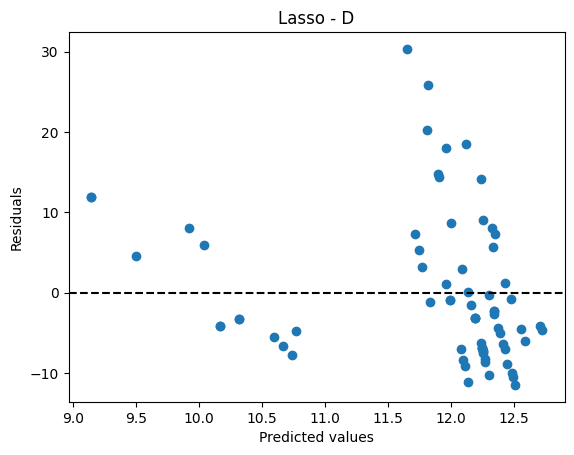

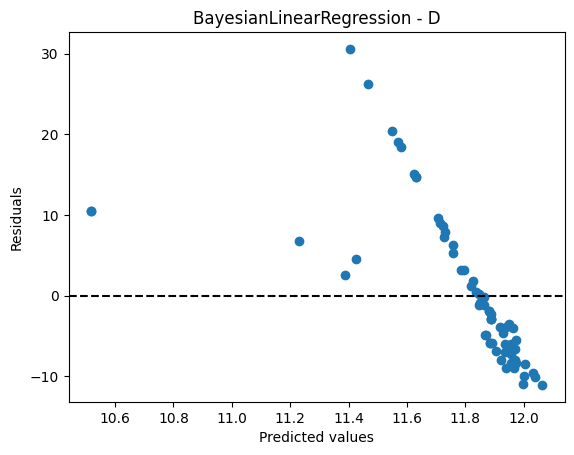

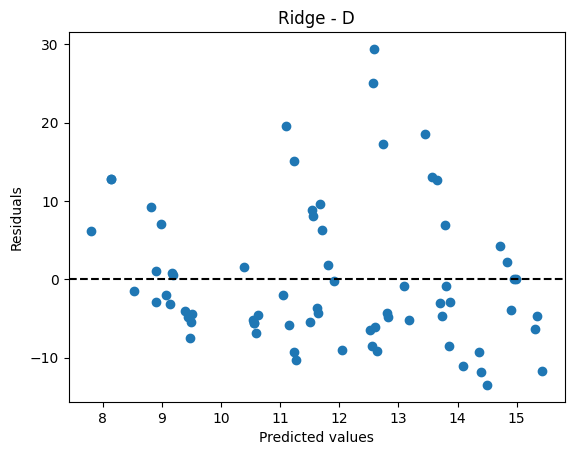

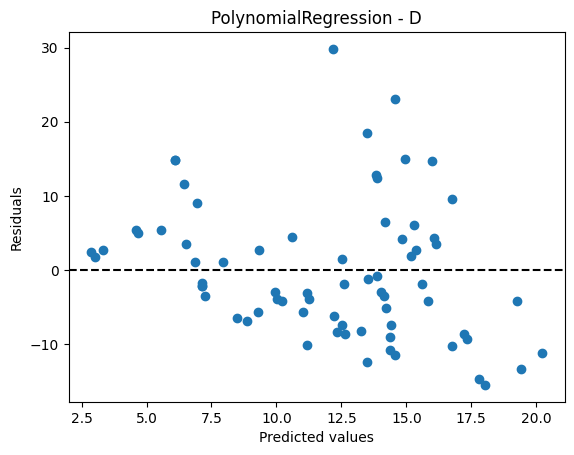

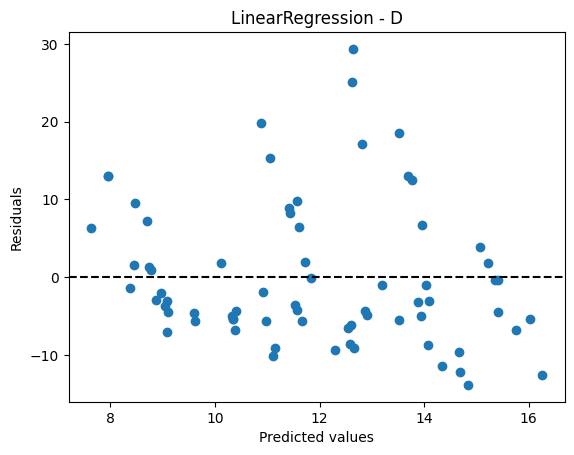

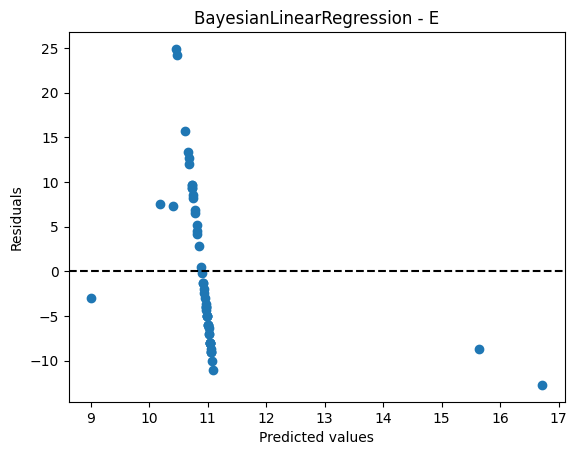

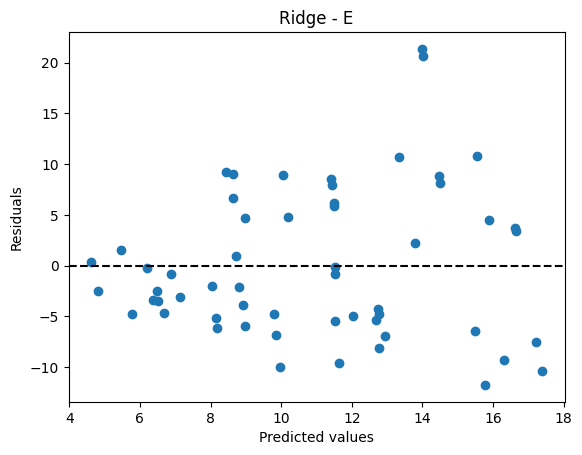

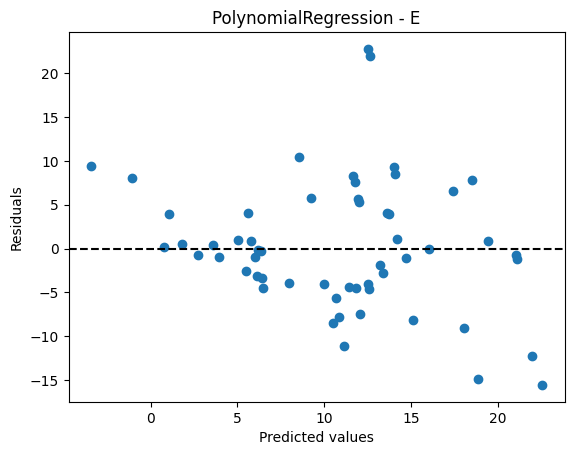

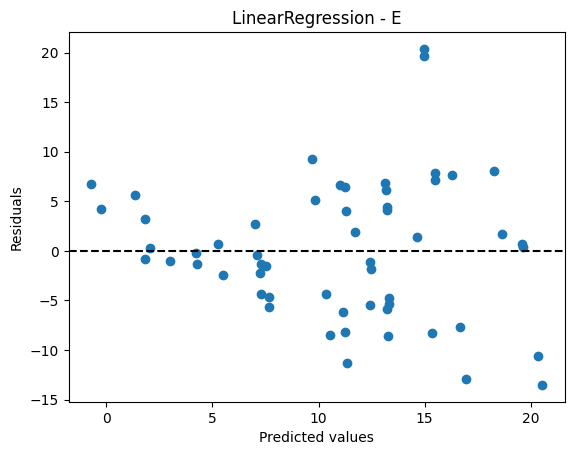

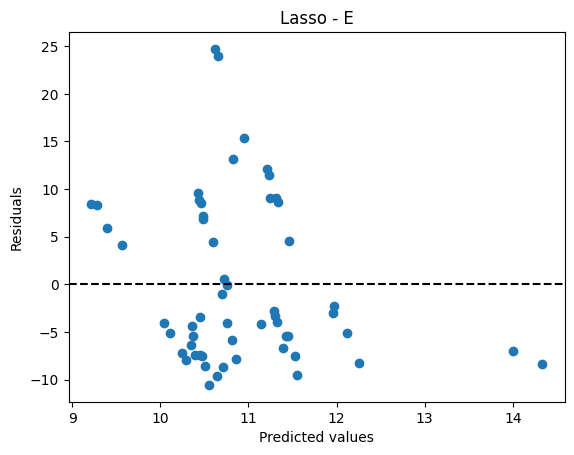

In [59]:
for site in df_results["Site"].unique():
    df_site = df_results[df_results["Site"] == site]
    for model in df_site["Model"].unique():
        df_model = df_site[df_site["Model"] == model]
        y_pred = df_model["y_pred"].values[0]
        residuals = df_model["Residuals"].values[0]
        plt.scatter(y_pred, residuals)
        plt.axhline(y=0.0, color="black", linestyle="--")
        plt.title(f"{model} - {site}")
        plt.xlabel("Predicted values")
        plt.ylabel("Residuals")
        plt.show()

#### Predicted vs Actual

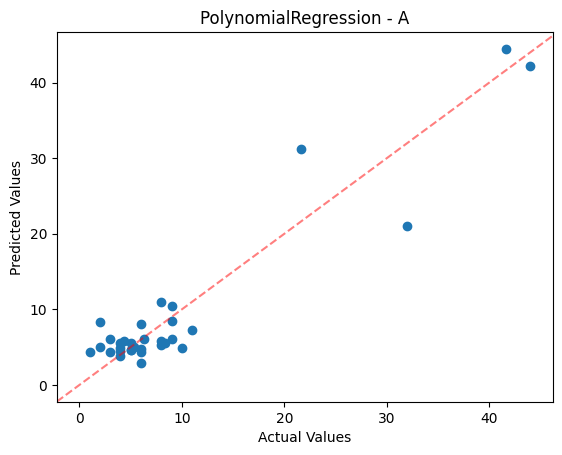

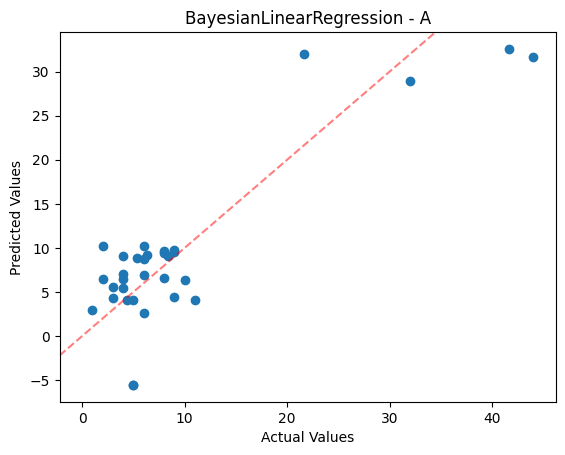

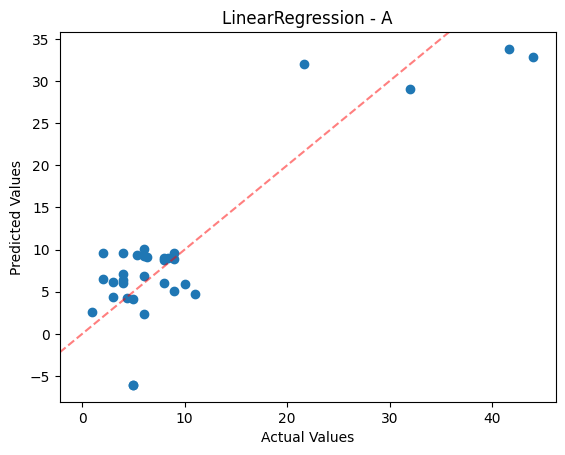

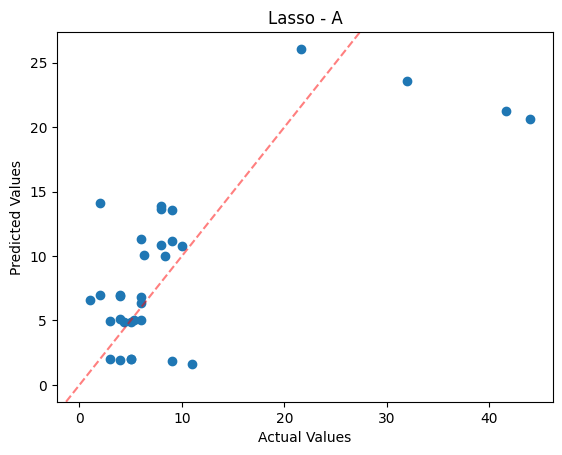

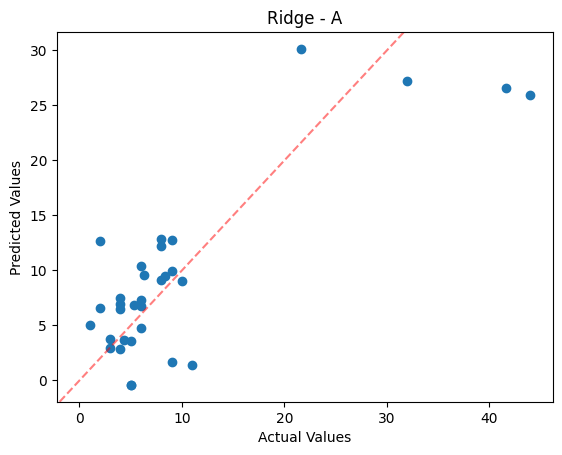

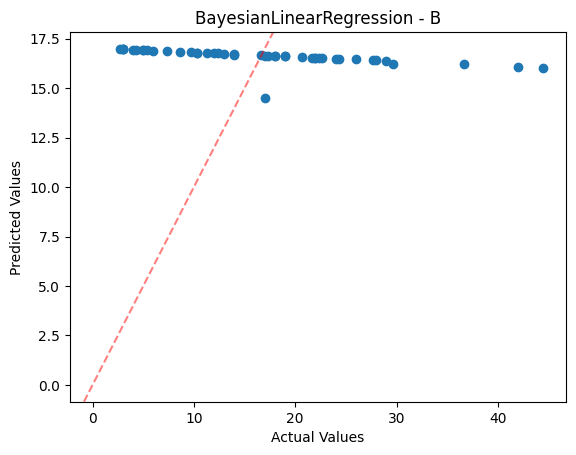

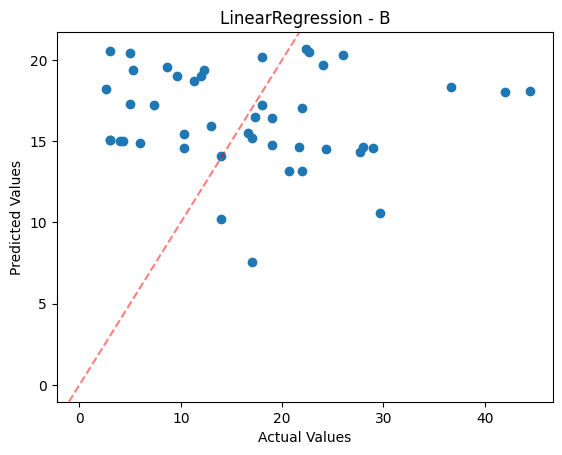

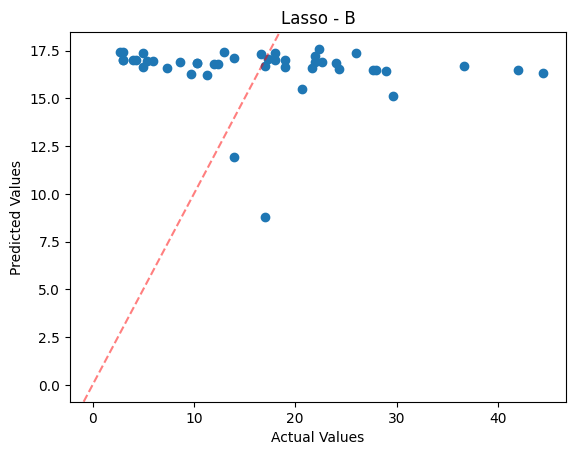

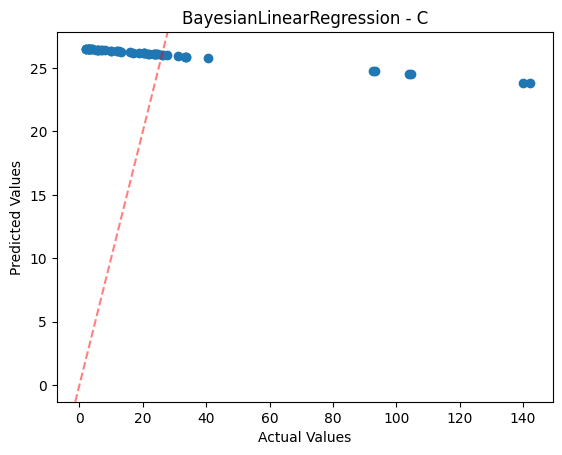

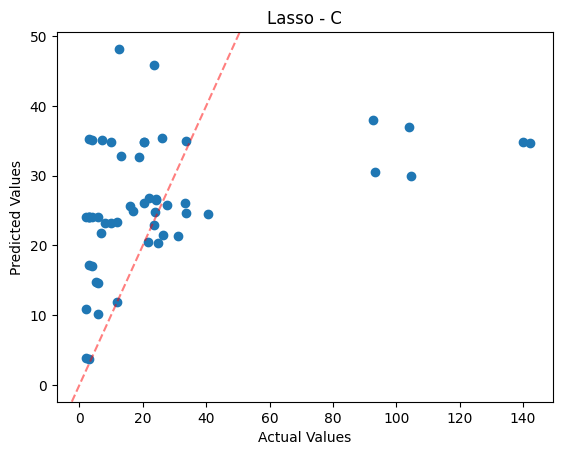

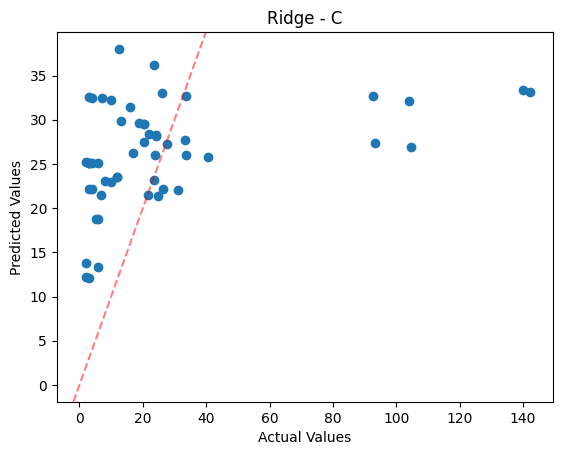

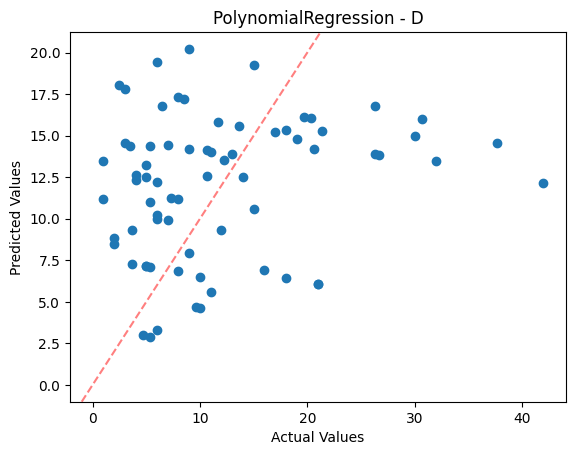

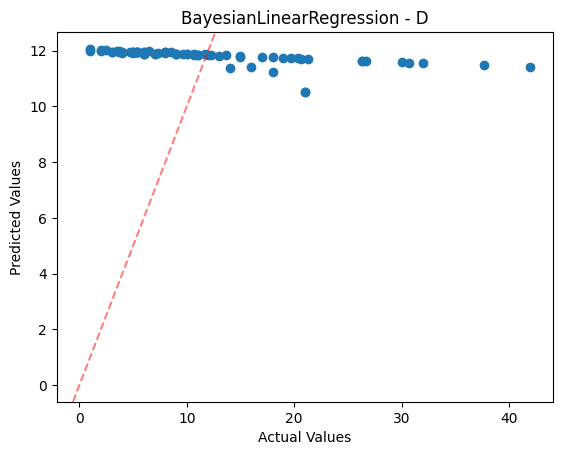

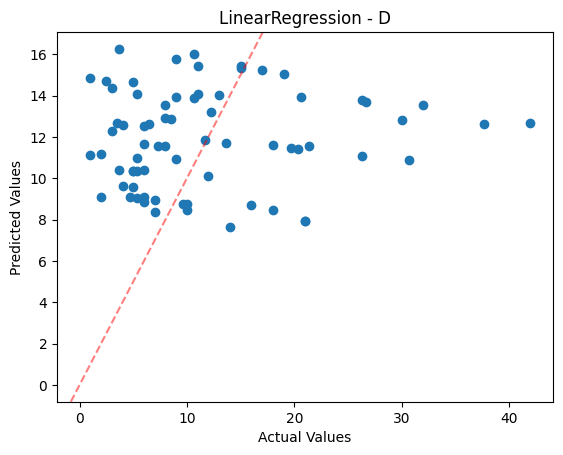

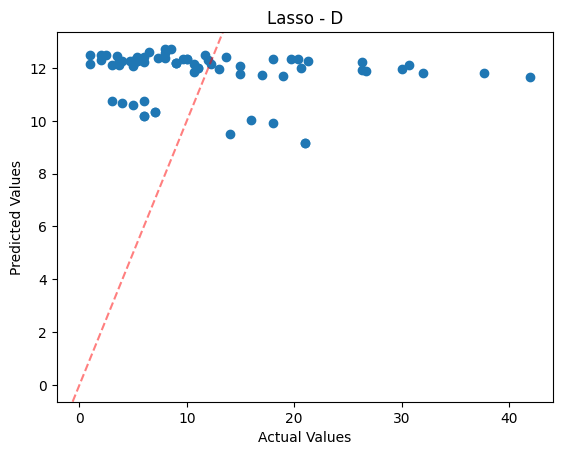

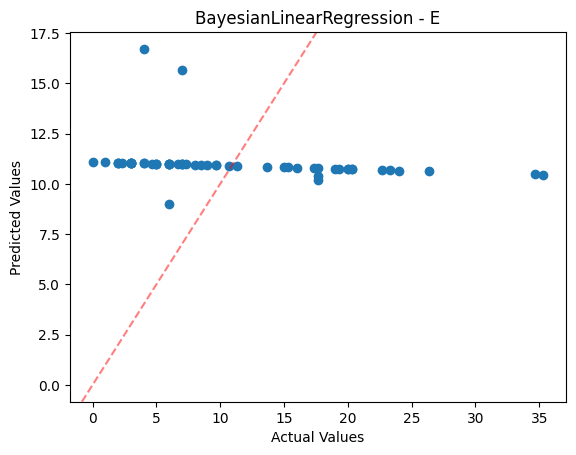

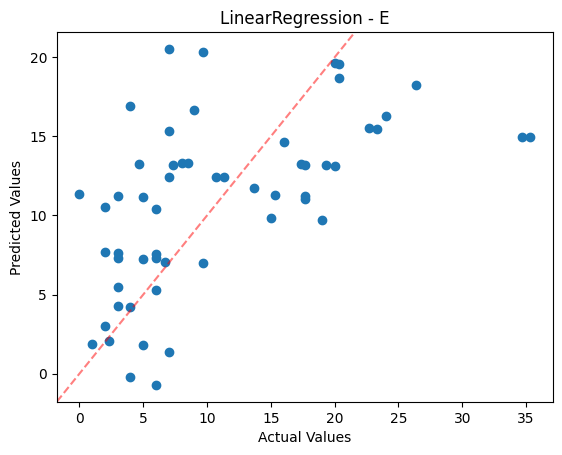

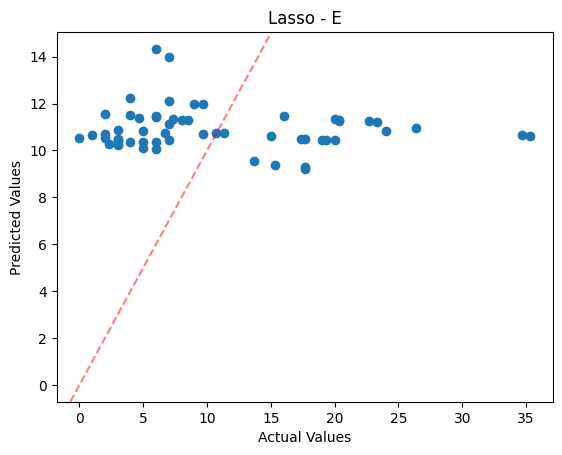

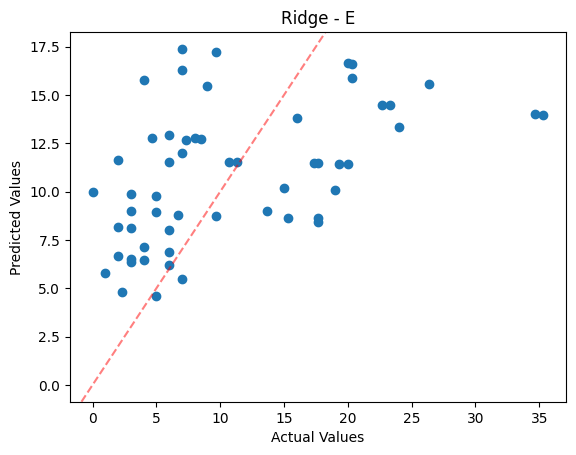

In [60]:
for site in df_results["Site"].unique():
    for model in df_results["Model"].unique():
        y_test = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_true"].values[0]
        y_pred = df_results[
            (df_results["Site"] == site) & (df_results["Model"] == model)
        ]["y_pred"].values[0]

        plt.scatter(y_test, y_pred)
        plt.axline([0, 0], [1, 1], color="red", linestyle="--", alpha=0.5)
        plt.title(f"{model} - {site}")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.show()